This notebook stores all of the plots I want to use in my REU paper

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import richardsplot
from astropy.cosmology import FlatLambdaCDM
import scipy.stats as spstats
import datetime as dt
import matplotlib.dates as mdates

In [2]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
def radluminosity(nu1, nu2, S_nu2, alpha, z):
    #calculate luminosity at nu1 based on data at nu2
    #input flux density units are µJy
    DL = 3.086e24*cosmo.luminosity_distance(z).value
    L = ((4*np.pi*DL**2*(S_nu2*1e-23*1e-6)) / ((1+z)**(1+alpha))) * (nu1/nu2)**alpha * 1e-7
    return np.log10(L)

def isNAN(arr):
    #this isnan works for strings too; np.isnan(a) only works if all elements
    #is arr are floats
    return arr!=arr

In [4]:
z0 = 0.25
FIRST = 10000 #FIRST flux in µJy
VLASS = 3234 #VLASS flux in µJy

a,b=radluminosity(6., 1.4, FIRST, -0.7, z0), radluminosity(6., 1.4, FIRST, -0.0, z0)
c,d=radluminosity(6., 3.0, VLASS, -0.7, z0), radluminosity(6., 3.0, VLASS, -0.0, z0)
print("FIRST: ({:.2f}, {:.2f})".format(a,b))
print("VLASS: ({:.2f}, {:.2f})".format(c,d))


FIRST: (23.81, 24.18)
VLASS: (23.55, 23.69)


In [5]:
#Typical upper-limit luminosity
radluminosity(6., 6., 11.4, -0.7, 0.29)

21.449994296153452

In [6]:
df = pd.read_csv("RQQfigs.csv")

sdss_names = df[["Name"]].values.flatten()
S6 = df[["Flux"]].values.flatten()
det = df[["Detection"]].values.flatten()==1
z = df[["z"]].values.flatten()
vlba = df[["VLBA"]].values.flatten()==1
#L6 = L_6(z, S6, -0.7)
L6 = radluminosity(6., 6., S6, -0.7, z)
mi = df[["i"]].values.flatten().astype("float")
Si = 10**((9.56-mi/2.5))
logR = np.log10(S6/Si)

df["logL6GHz [W/Hz]"] = L6
#df.to_csv("RQQfigs.csv", index=False)


S6_kell = df[["S(6)_t"]].values.flatten()
L6_kell = radluminosity(6., 6., S6_kell, -0.7, z)

flux_ratio = S6/S6_kell

In [7]:
Sbins = np.logspace(np.log10(min(S6)), np.log10(max(S6)), 15)
Lbins = np.linspace(min(L6), max(L6_kell), 15)
Rbins = np.linspace(-3., max(logR), 15) #one is ~ -10
ratbins = np.logspace(np.log10(min(flux_ratio)), np.log10(max(flux_ratio)), 25)

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


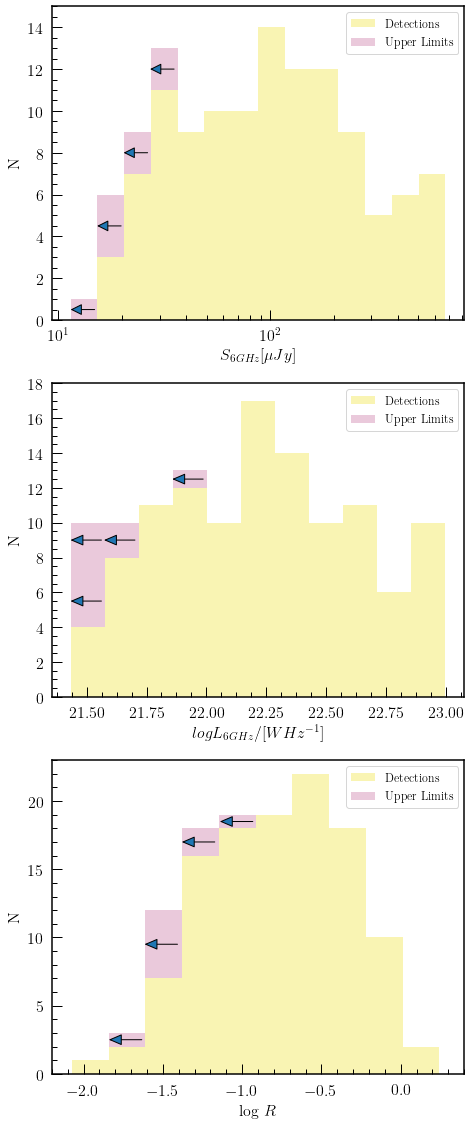

In [8]:
fig, axs = plt.subplots(3, 1, figsize=(7,16))
bins3 = np.linspace(min(L6), max(L6_kell), 12)

axs[0].hist([S6[det], S6[~det]], histtype="barstacked", color=["#f0e442", "#cc79a7"], 
         alpha=0.4, bins=Sbins, label=["Detections", "Upper Limits"])
axs[0].set_ylim(0,15)
axs[0].set_xscale("log")
axs[0].legend(loc="best")
axs[0].set_xlabel("$S_{6GHz}  [\\mu Jy]$")
axs[0].set_ylabel("N")
axs[0].annotate('', xy=(10**1.18, 0.5), xytext=(-28, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.6"))
axs[0].annotate('', xy=(10**1.305, 4.5), xytext=(-28, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.6"))
axs[0].annotate('', xy=(10**1.43, 8), xytext=(-28, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.6"))
axs[0].annotate('', xy=(10**1.555, 12), xytext=(-28, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.6"))





axs[1].hist([L6[det], L6[~det]], histtype="barstacked", color=["#f0e442", "#cc79a7"], 
         alpha=0.4, bins=bins3, label=["Detections", "Upper Limits"])
axs[1].set_ylim(0,18)
axs[1].legend(loc="best")
axs[1].set_xlabel("$logL_{6GHz} / [W Hz^{-1}]$")
axs[1].set_ylabel("N")
axs[1].annotate('', xy=(21.57, 5.5), xytext=(-35, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[1].annotate('', xy=(21.57, 9), xytext=(-35, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[1].annotate('', xy=(21.71, 9), xytext=(-35, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[1].annotate('', xy=(21.995, 12.5), xytext=(-35, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))



axs[2].hist([logR[det], logR[~det]], histtype="barstacked", color=["#f0e442", "#cc79a7"], 
         alpha=0.4, bins=Rbins, label=["Detections", "Upper Limits"])
axs[2].set_ylim(0,23)
axs[2].set_xlim(-2.2,0.4)
axs[2].legend(loc="best")
axs[2].set_xlabel("log $R$")
axs[2].set_ylabel("N")
axs[2].annotate('', xy=(-1.62, 2.5), xytext=(-37, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[2].annotate('', xy=(-1.395, 9.5), xytext=(-37, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[2].annotate('', xy=(-1.16, 17), xytext=(-37, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))
axs[2].annotate('', xy=(-0.92, 18.5), xytext=(-37, 0), textcoords='offset points', 
                arrowprops=dict(arrowstyle="<|-, head_width=0.3, head_length=0.7"))



plt.tight_layout()
#plt.savefig("PaperPlots/radio_distributions.pdf")


/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


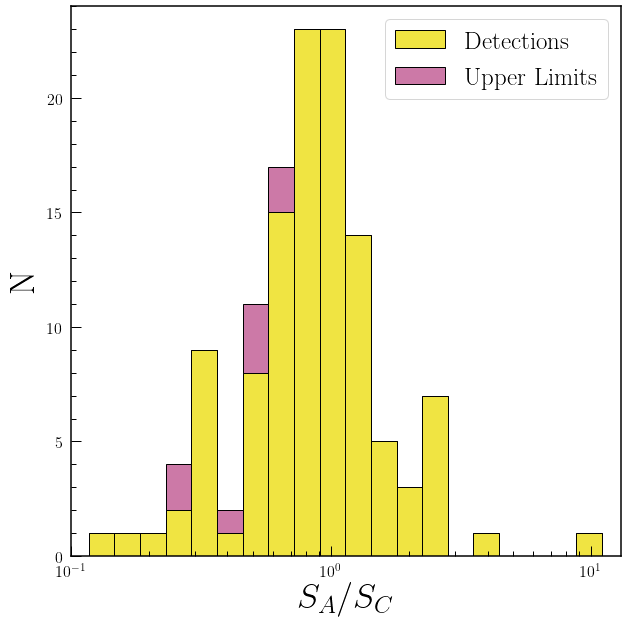

Median ratio: 0.85
Mean ratio  : 1.04
Std ratio   : 1.08


In [9]:
fig = plt.figure(figsize=(9,9))

plt.hist([flux_ratio[det], flux_ratio[~det]], histtype="barstacked", color=["#f0e442", "#cc79a7"],
          edgecolor="k", bins=ratbins, label=["Detections", "Upper Limits"])


#fit lognormal to the distribution
ratio_mu, ratio_loc, ratio_std = spstats.lognorm.fit(data=flux_ratio)
ratio_pdf = spstats.lognorm.pdf(x=ratbins, s=ratio_std, scale=ratio_mu)
#plt.plot(ratbins, ratio_pdf, '--g')

plt.legend(loc="best", prop={"size": 25})
plt.xscale("log")
plt.xlabel("$S_A/S_C$", fontsize=35)
plt.ylabel("N", fontsize=35)
plt.xlim(1e-1, 1.3e1)
plt.ylim(0,24.)
plt.tight_layout()
#plt.savefig("PaperPlots/fluxratio.pdf")
plt.show()

print("Median ratio: %.2f" % (np.median(flux_ratio)))
print("Mean ratio  : %.2f" % (np.mean(flux_ratio)))
print("Std ratio   : %.2f" % (np.std(flux_ratio)))



I'm not currently convinced by those three sources far to the right.  

I should do more imaging for sources that appear very variable in this plot, but Amy and I should also go through all images and at least assert which ones are point sources.  
    * 1034+6053 (SB1) - has strong imaging errors that need fixing
    * 1155+5021 (SB1) - may have many noise peaks and should be re-evaluated
    * 0952+5201 (SB3) - actually looks like a point source
    * 1206+2814 (SB1) - is either very interesting&confusing, or not real at all
    * 1000+1047 (SB1) - is a v. bright source and should be re-imaged; check 'lobe'
    * 0822+4553 (SB2) - maybe could use MTMFS

That would help a lot with interpreting the above plot because then we could truncate the additional flux ``imfit`` measured in calculating integrated flux, shifting the plot leftward.

---

On 8/4/2020, I collected data from Barvainis et al. (2005) and now I want to see how their claimed RQQs compare with ours.  Their parent sample selection criteria is the following:

* Select all quasars from the Palomar-Green and Large Bright Quasar Survey with $S_{\nu}>0.3mJy$
    * 10? observations - longest baseline gave angular scales $\sim1.3''$ x $1''$


* Remove lobe-dominated sources [check the angular scales - lobed sources in these sources may in fact be massive and there were probably many that we'd consider "lobe-dominated" with better resolution]


* As there was a dearth of intermediate-redshift sources, they also "arbitrarily select" 7 of the $\sim$30 sources in Veron-Cetty *that were detected in NVSS*


* Amounts to choosing 11 RQQs, 11 RIQs, 11 RLQs


* Used 3C48 as flux density calibrator, although they mention that this was accounted for by using a nearby phase calibrator...


* Variability occurs on timescales of ~0.2-0.5yr in RQQs, while our observations are spaced ~8yr apart

In [10]:
df3 = pd.read_csv("BarvainisRQQs.csv")

Bnames = df3[["Name"]].values.flatten()
alpha_bar = df3[["alpha"]].values.flatten()      #spectral indices measured in Barvainis+05
z_bar = df3[["z"]].values.flatten()              #redshifts range from 0.025 to 3.3
#var = df3[["f_var (%)"]].values.flatten() > 1    #mask RQQs that show variability
S_bar = df3[["S_8.4(t) [uJy]"]].values.flatten() #mean 8.4GHz flux measured 
L_bar = radluminosity(6., 8.4, S_bar, alpha_bar, z_bar)

df3["L6GHz [W/Hz; no evolution]"] = L_bar
df3["L6GHz [W/Hz; evolution]"] = np.log10((10**L_bar) * ((1+0.25)/(1+z_bar))**3)
#df3.to_csv("BarvainisRQQs.csv", index=False)

df3

Name      z  S_8.4(t) [uJy]  alpha  L6GHz [W/Hz; no evolution]  \
0   V0000-0229  1.070             800  -0.70                   24.701365   
1    P0003+199  0.025            2300  -0.59                   21.597396   
2   L0004+0224  0.300            1100  -0.59                   23.541077   
3    P0049+171  0.064             700   0.46                   21.733473   
4    P0052+251  0.155             700   0.48                   22.497913   
5    P0157+001  0.164            4600  -0.87                   23.650742   
6   L0302-0019  3.281             400   0.19                   24.804575   
7    P2112+059  0.466             500  -0.52                   23.604480   
8    P2130+099  0.061            1500  -0.77                   22.234081   
9   L2231-0015  3.015             500   0.65                   24.501564   
10   P2304+042  0.042            1000   0.67                   21.487617   

    L6GHz [W/Hz; evolution]  
0                 24.044184  
1                 21.855954  
2                 23.489977  
3                 21.943378  
4                 22.600897  
5                 23.743613  
6                 23.200669  
7                 23.396808  
8                 22.447664  
9                 22.981237  
10                21.724744

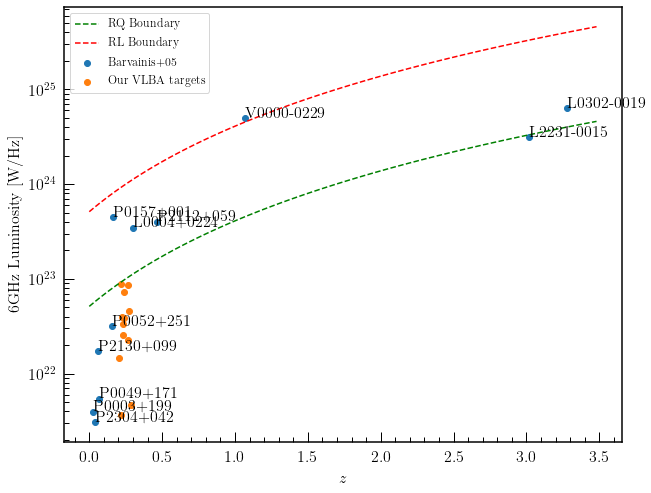

In [11]:
fig = plt.figure(figsize=(10,8))

zplot = np.linspace(0, max(z_bar)+0.2, 100)

#We define RQ to be L_6GHz < 10^23 W/Hz - compute across z

#Assume RLF evolves like (1+z)^3 - first compute at z=0 and can plot the rest
L_z0 = 10**23 / ((1+0.25)**3)
L_z01 = 10**24 / ((1+0.25)**3)
radio_quiet = L_z0*((1+zplot)**3)
radio_loud = L_z01*((1+zplot)**3)

plt.scatter(z_bar, 10**L_bar, label="Barvainis+05")
plt.scatter(z[vlba], 10**L6[vlba], label="Our VLBA targets")
plt.plot(zplot, radio_quiet, '--g', label="RQ Boundary")
plt.plot(zplot, radio_loud, '--r', label="RL Boundary")

for name,redshift,L in zip(Bnames,z_bar,L_bar):                                       
    plt.annotate('%s' % name, xy=(redshift, 10**L), textcoords='data')

#plt.xscale("log")
plt.yscale("log")
plt.ylabel("6GHz Luminosity [W/Hz]")
plt.xlabel("$z$")
plt.legend(loc="best")

Dashed green line represents the boundary between radio-quiet and radio-intermediate QSOs in a given redshift range, assuming QSOs evolve like $(1+z)^3$


Hmm, it looks like we can definitely learn a few things from this sample then... While >1/2 isn't RQ by our definition, 5 targets appear firmly RQ, and 3/5 of those RQQs appear to show some variability (values above).


Regardless of their sample, we can use our findings to back up their claims, as our time scales are much longer and we're much better-equipped to answer this question with our sample.  Something to check though: why is all their variability in the positive direction??  We seem to detect variability both ways, which is really what we expect




#### Let's further investigate variability in our sample:

[Of course the earlier ratio histogram is an indicator... (mixed in with some resolution effects)]


Also want:

* Some kind of plot showing how "resolving out" varies with C-config flux density

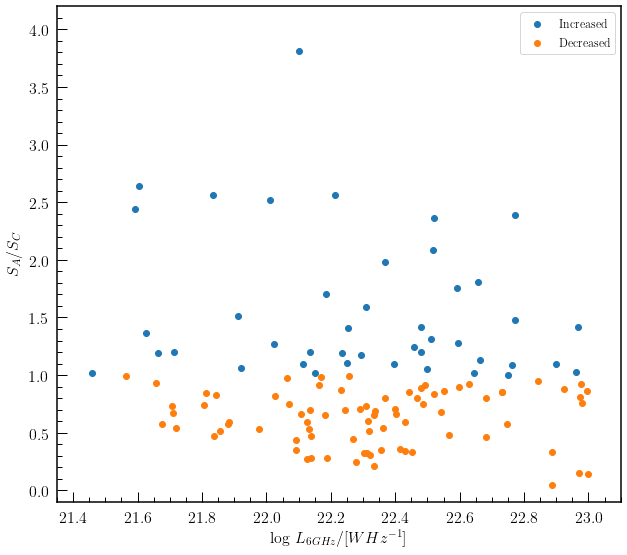

In [12]:
pos = (flux_ratio>1)

fig = plt.figure(figsize=(9,8))

plt.scatter(L6_kell[pos], flux_ratio[pos], label="Increased")
plt.scatter(L6_kell[~pos], flux_ratio[~pos], label="Decreased")



#plt.yscale("log")
#plt.xscale("log")
plt.ylim(-0.1,4.2)
plt.xlim(21.35,23.1)



plt.ylabel("$S_A/S_C$")
plt.xlabel("log $L_{6GHz} / [W Hz^{-1}]$")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig("PaperPlots/variability_vs_L.pdf")
plt.show()

There doesn't appear to be any relation between variability and luminosity - regardless of the sample selection in Barvainis+05, this is consistent with their findings




----

On 8/5/2020, I want to do the same sort of analysis as above, but seeing where the claimed RQQs observed with VLBA in Ulvestad et al. (2005) lie in the same luminosity distribution as above.  Specifically, I'm interested in which sources show a loss of flux density between their respective VLA-->VLBA observations

In [13]:
df4 = pd.read_csv("UlvestadRQQs.csv")

Unames = df4[["Name"]].values.flatten()
alpha_U = df4[["alpha"]].values.flatten()      #spectral indices measured in Ulvestad+05
z_U = df4[["z"]].values.flatten()              
S_U = df4[["S_5GHz [mJy]"]].values.flatten()*1e3 #5GHz flux measured (mJy)
L_U = radluminosity(6., 5., S_U, alpha_U, z_U)

df4["L6GHz [W/Hz; no evolution]"] = L_U
df4["L6GHz [W/Hz; evolution]"] = np.log10((10**L_U) * ((1+0.25)/(1+z_U))**3)
#df4.to_csv("UlvestadRQQs.csv", index=False)

df4

Name      z  S_5GHz [mJy]  alpha  L6GHz [W/Hz; no evolution]  \
0  J0804+6459  0.148          11.7   -1.1                   23.758725   
1  J1219+0638  0.334           9.1    0.5                   24.379118   
2  J1353+6345  0.087           7.0   -1.5                   23.019921   
3  J1436+5847  0.033           5.1   -1.0                   22.028546   
4  J0046+0104  2.137           4.1    0.0                   25.647509   
5  J1225+2235  2.058           7.3    0.0                   25.869145   
6  J1316+0051  2.393           4.0    0.1                   25.677307   
7  J1409+2618  0.945           5.1   -1.0                   25.285767   

   L6GHz [W/Hz; evolution]  
0                23.869629  
1                24.294381  
2                23.201962  
3                22.276976  
4                24.448696  
5                24.703563  
6                24.376285  
7                24.709738

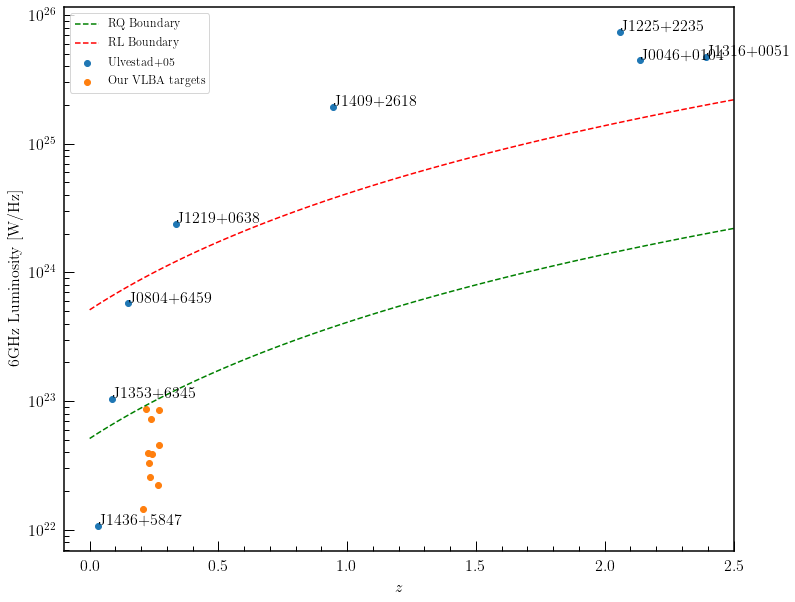

In [14]:
fig = plt.figure(figsize=(12,10))

plt.scatter(z_U, 10**L_U, label="Ulvestad+05")
plt.scatter(z[vlba], 10**L6[vlba], label="Our VLBA targets")
plt.plot(zplot, radio_quiet, '--g', label="RQ Boundary")
plt.plot(zplot, radio_loud, '--r', label="RL Boundary")


for name,redshift,L in zip(Unames,z_U,L_U):                                       
    plt.annotate('%s' % name, xy=(redshift, 10**L), textcoords='data')


plt.xlim(-.1, 2.5)
plt.yscale("log")
plt.ylabel("6GHz Luminosity [W/Hz]")
plt.xlabel("$z$")
plt.legend(loc="best")

----

8/6/2020: Herrera Ruiz et al. (2016) detected 3/18 observed RQQs using the VLBA, arguing that detections of compact radio cores showed that AGN dominates the radio, at least in some RQQs.  They used several criteria to distinguish RQ/RL, but didn't account for any redshift evolution or apply any K-corrections to their 1.4GHz data, so I want to see how introducing some of that compares them to our VLBA targets (and if they're really RQ)

In [15]:
df5 = pd.read_csv("HerreraRuiz2016RQQs.csv")

HRnames = df5[["Name"]].values.flatten()
z_HR = df5[["z"]].values.flatten()              
S_HR = df5[["S_1.4GHz [VLA; uJy]"]].values.flatten() 
L_HR = radluminosity(6., 1.4, S_HR, -0.7, z_HR)

df5["L6GHz [W/Hz; no evolution]"] = L_HR
df5["L6GHz [W/Hz; evolution]"] = np.log10((10**L_HR) * ((1+0.25)/(1+z_HR))**3)
#df5.to_csv("HerreraRuiz2016RQQs.csv", index=False)

df5

Name     z  S_1.4GHz [VLA; uJy]  S_1.4GHz [VLBA; uJy]  \
0  C0366  2.94                  362                   255   
1  C1397  2.54                  293                   156   
2  C1897  1.24                  311                   236   

   logL_1.4GHz [theirs; W/Hz]  L6GHz [W/Hz; no evolution]  \
0                       25.30                   24.804967   
1                       25.07                   24.573580   
2                       24.38                   23.894526   

   L6GHz [W/Hz; evolution]  
0                23.309208  
1                23.217300  
2                23.134512

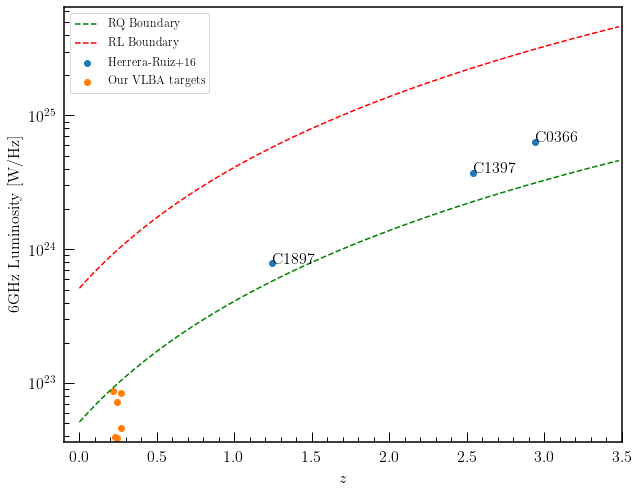

In [16]:
fig = plt.figure(figsize=(10,8))

plt.scatter(z_HR, 10**L_HR, label="Herrera-Ruiz+16")
plt.scatter(z[vlba], 10**L6[vlba], label="Our VLBA targets")
plt.plot(zplot, radio_quiet, '--g', label="RQ Boundary")
plt.plot(zplot, radio_loud, '--r', label="RL Boundary")


for name,redshift,L in zip(HRnames,z_HR,L_HR):                                       
    plt.annotate('%s' % name, xy=(redshift, 10**L), textcoords='data')

plt.xlim(-.1, 3.5)
plt.yscale("log")
plt.ylabel("6GHz Luminosity [W/Hz]")
plt.xlabel("$z$")
plt.legend(loc="best")

In [17]:
bar1 = df3[["L6GHz [W/Hz; evolution]"]].values.flatten()
bar2 = df3[["L6GHz [W/Hz; no evolution]"]].values.flatten()

ulv1 = df4[["L6GHz [W/Hz; evolution]"]].values.flatten()
ulv2 = df4[["L6GHz [W/Hz; no evolution]"]].values.flatten()

HR1 = df5[["L6GHz [W/Hz; evolution]"]].values.flatten()
HR2 = df5[["L6GHz [W/Hz; no evolution]"]].values.flatten()

L6_lin = L6

logbins1 = np.linspace(min(min(L6_lin), min(bar1), min(ulv1)), max(max(L6_lin), max(bar1), max(ulv1)), 20)
logbins2 = np.linspace(min(min(L6_lin), min(bar2), min(ulv2)), max(max(L6_lin), max(bar2), max(ulv2)), 20)

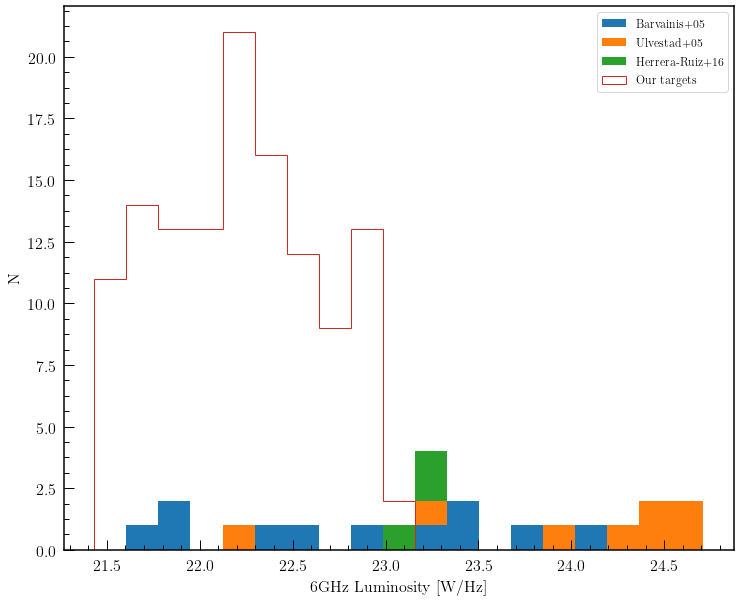

In [18]:
fig = plt.figure(figsize=(12,10))

plt.hist([bar1, ulv1, HR1], histtype="barstacked", bins=logbins1, #density=True,
          label=["Barvainis+05", "Ulvestad+05", "Herrera-Ruiz+16"])
plt.hist(L6_lin, histtype="step", bins=logbins1, #density=True,
          label="Our targets")

plt.xlabel("6GHz Luminosity [W/Hz]")
plt.ylabel("N")
plt.legend(loc="best")



---

## Morphologies

In [19]:
A_morph = df[["A_morph"]].values.flatten()
U = (A_morph=="U")   #unresolved
SR = (A_morph=="SR") #slightly resolved
M = (A_morph=="M")   #muliple (>=2) component
D = (A_morph=="D")   #double lobe, no core
E = (A_morph=="E")   #asymmetric (basically all the more complicated ones for now)
ND = (A_morph=="ND") #non-detection

In [20]:
(~U).sum()

70

In [21]:
print("Morphology number counts for all RQQs\n")

print("Unresolved        : %d" % U.sum())
print("Resolved          : %d\n" % ((~U).sum()-(isNAN(A_morph).sum())-ND.sum()))
print("Slightly resolved : %d" % SR.sum())
print("Multi-component   : %d" % M.sum())
print("Double lobe       : %d" % D.sum())
print("Extended          : %d" % E.sum())
print("Non-detections    : %d" % ND.sum())

Morphology number counts for all RQQs

Unresolved        : 54
Resolved          : 55

Slightly resolved : 33
Multi-component   : 13
Double lobe       : 1
Extended          : 8
Non-detections    : 6


In [22]:
55/124

0.4435483870967742

In [23]:
Sbins = np.logspace(np.log10(min(S6)), np.log10(max(S6)), 15)
Lbins = np.linspace(min(L6), max(L6), 15)
zbins = np.linspace(min(z), max(z), 15)

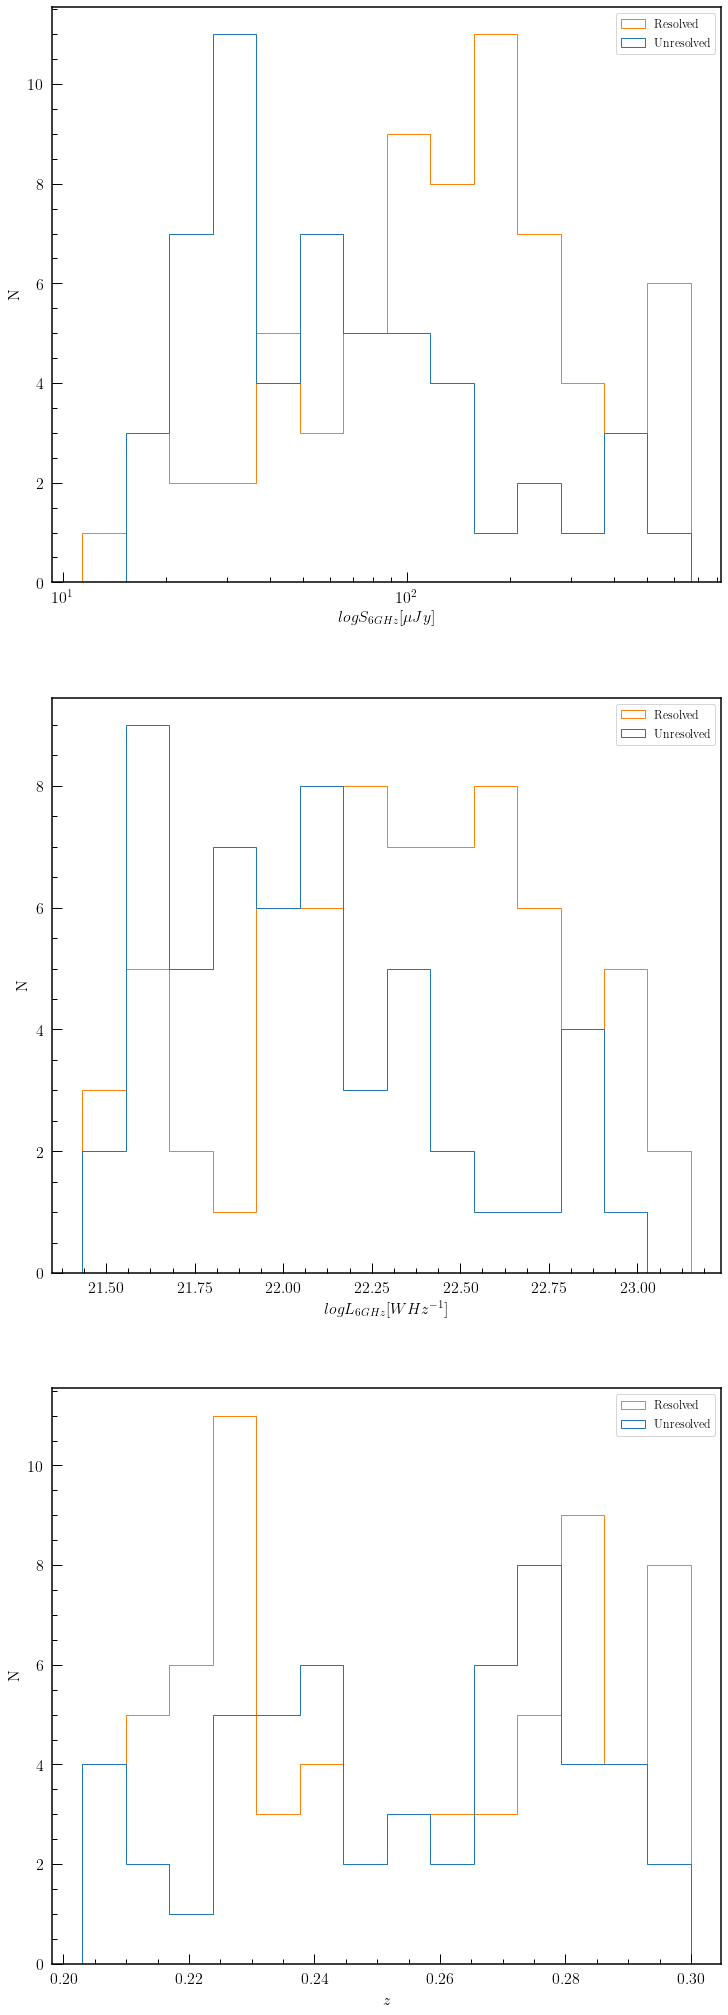

In [24]:
fig, axs = plt.subplots(3, 1, figsize=(12, 36))

axs[0].hist([S6[U], S6[~U]], histtype="step", bins=Sbins, label=["Unresolved", "Resolved"])

axs[0].set_xscale("log")
axs[0].set_xlabel("$log S_{6GHz} [\mu Jy]$")
axs[0].set_ylabel("N")
axs[0].legend(loc="best")


axs[1].hist([L6[U], L6[~U]], histtype="step", bins=Lbins, label=["Unresolved", "Resolved"])

axs[1].set_xlabel("$log L_{6GHz} [W Hz^{-1}]$")
axs[1].set_ylabel("N")
axs[1].legend(loc="best")


axs[2].hist([z[U], z[~U]], histtype="step", bins=zbins, label=["Unresolved", "Resolved"])

axs[2].set_xlabel("$z$")
axs[2].set_ylabel("N")
axs[2].legend(loc="best")

A not overly surprising result: resolved sources tend to have higher flux densities than the unresolved sources - though is the difference subtler in the luminosity plot?  There doesn't seem to been any significant skew in the redshift plot (definitely not as strong as the separation in flux densities.


###### How does the flux ratio correlate with morphology?

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


Unresolved sources
Median ratio: 0.74
Mean ratio  : 0.83
Std ratio   : 0.47


Resolved sources
Median ratio: 0.91
Mean ratio  : 1.20
Std ratio   : 1.35


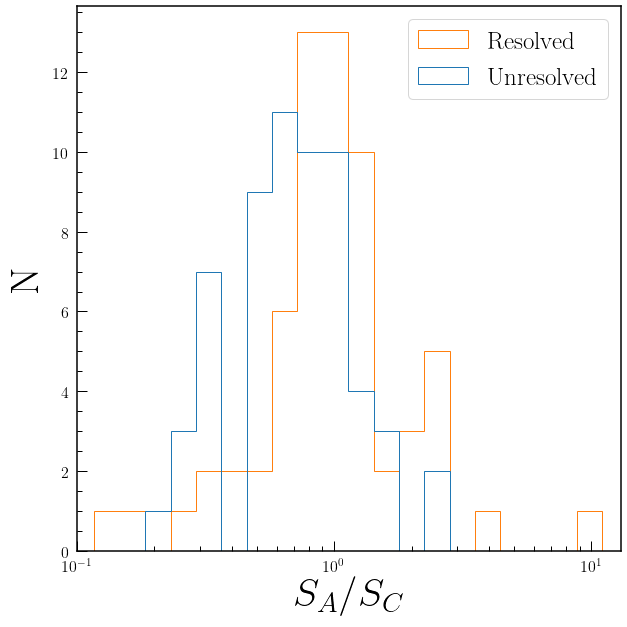

In [25]:
fig = plt.figure(figsize=(9,9))

plt.hist([flux_ratio[U|ND], flux_ratio[~U&~ND]], histtype="step", bins=ratbins, label=["Unresolved", "Resolved"])

plt.xscale("log")
plt.xlim(1e-1, 1.3e1)
plt.xlabel("$S_A/S_C$", fontsize=40)
plt.ylabel("N", fontsize=40)
plt.legend(loc="best", prop={"size": 25})
plt.tight_layout()
plt.savefig("PaperPlots/fluxratio_resolution.pdf")

print("Unresolved sources")
print("Median ratio: %.2f" % (np.median(flux_ratio[U])))
print("Mean ratio  : %.2f" % (np.mean(flux_ratio[U])))
print("Std ratio   : %.2f\n\n" % (np.std(flux_ratio[U])))

print("Resolved sources")
print("Median ratio: %.2f" % (np.median(flux_ratio[~U])))
print("Mean ratio  : %.2f" % (np.mean(flux_ratio[~U])))
print("Std ratio   : %.2f" % (np.std(flux_ratio[~U])))

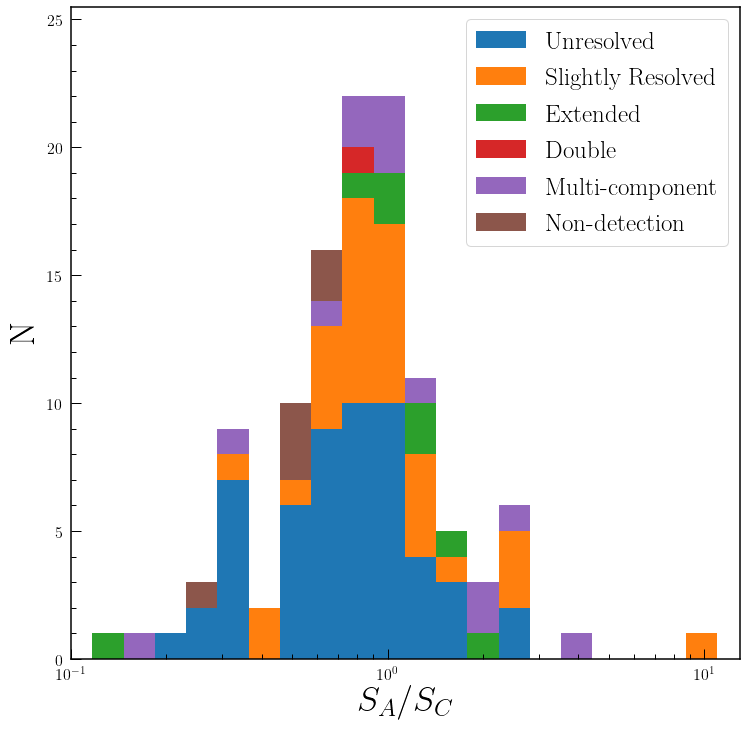

In [26]:
fig = plt.figure(figsize=(12,12))

plt.hist([flux_ratio[U], flux_ratio[SR], flux_ratio[E], flux_ratio[D]
         , flux_ratio[M], flux_ratio[ND]], histtype="barstacked", bins=ratbins, 
         label=["Unresolved", "Slightly Resolved", "Extended", "Double", 
                "Multi-component", "Non-detection"])

plt.xlabel("$S_A/S_C$", fontsize=35)
plt.ylabel("N", fontsize=35)
plt.xlim(1e-1, 1.3e1)
plt.ylim(0,25.5)
plt.xscale("log")
plt.legend(loc="best", prop={"size": 25})
plt.show()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


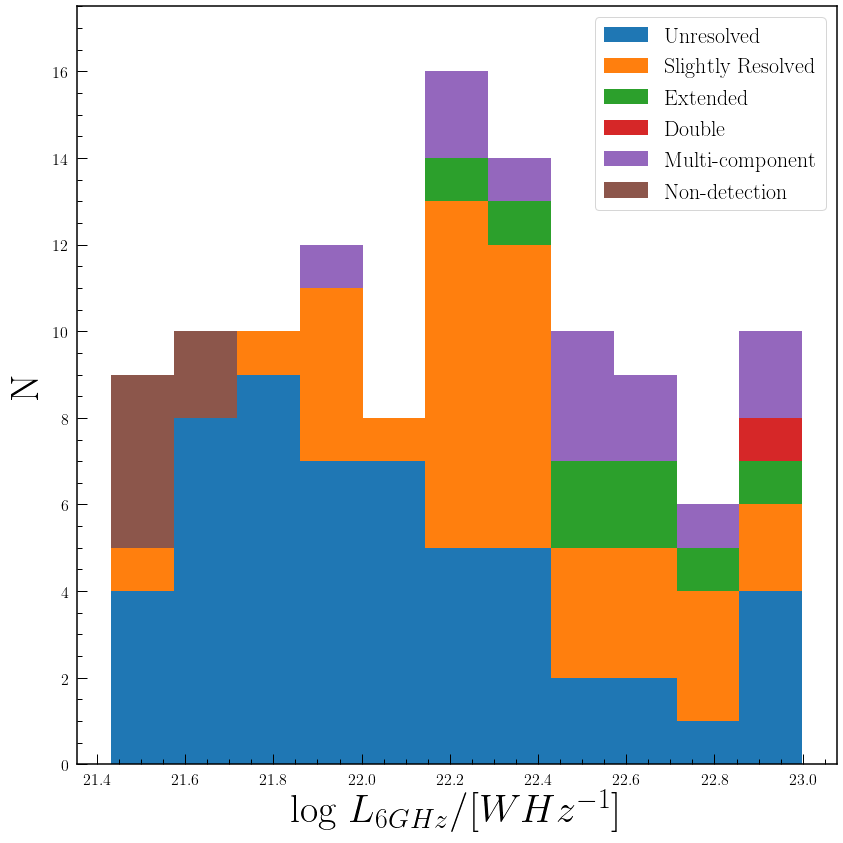

In [27]:
fig = plt.figure(figsize=(12,12))

plt.hist([L6[U], L6[SR], L6[E], L6[D], L6[M], L6[ND]],
          histtype="barstacked", bins=bins3, 
         label=["Unresolved", "Slightly Resolved", "Extended", "Double", 
                "Multi-component", "Non-detection"])

plt.xlabel("log $L_{6GHz} / [W Hz^{-1}]$", fontsize=40)
plt.ylabel("N", fontsize=40)
#plt.xlim(1e-1, 1.3e1)
plt.ylim(0,17.5)
#plt.xscale("log")
plt.legend(loc="best", prop={"size": 22})
plt.tight_layout()
#plt.savefig("PaperPlots/morphologies_L6.pdf")
plt.show()

-----
### Investigate variability including FIRST/VLASS measurements in the 6 targets that we are following up with VLBA

Timeline:
* FIRST ~1997
* VLA2010/11
* VLASS ~2018
* VLA2019


Targets:
* J0822+4553
* J1000+1047
* J1045+2933
* J1425+0803
* J1617+0638
* J1627+4736

I checked to see if any of our variable sources showed up in FIRST or VLASS.  (These are the 6 variable sources we decided to follow up on with the VLBA).  Several do, but converting measured FIRST/VLASS flux densities from 1.4/3GHz to match our 6GHz observations is a tricky issue:  (i) if these sources are so compact and surely contain an AGN, is $\alpha=-0.7$ really the best choice?;  (ii) if we find that these sources are variable, which they do appear to be, we can't simply derive a spectral index from 1.4/3GHz $\rightarrow$ 6GHz because that is under the assumption that the radio SED follows a constant power law over decadal timescales (which Nyland et al. show is not true).  


For now, I handle this issue by defining upper and lower bounds of each converted 6 GHz luminosity to be from assuming $\alpha=-1.0$ and $\alpha=0.0$, respectively.  The "true" 6 GHz luminosity is derived by assuming $\alpha=-0.7$.  It'd be nice if we thought of a better way to do this since this results in a very wide range of predicted luminosities that makes this analysis a lot less interesting than it potentially could be

In [28]:
L6_first = df[["L6_FIRST"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
#L6_firstlow = df[["L6_FIRST_alphamin1"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
L6_firstup = df[["L6_FIRST_alpha0"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]

L6_2011 = L6_kell[df[["L6_FIRST"]].values.flatten()>0]
L6_2011up = radluminosity(6., 6., S6_kell[df[["L6_FIRST"]].values.flatten()>0], 0.0, z[df[["L6_FIRST"]].values.flatten()>0])

L6_vlass = df[["L6_VLASS"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
#L6_vlasslow = df[["L6_VLASS_alphamin1"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
L6_vlassup = df[["L6_VLASS_alpha0"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]

L6_2019 = L6[df[["L6_FIRST"]].values.flatten()>0]
L6_2019up = radluminosity(6., 6., S6[df[["L6_FIRST"]].values.flatten()>0], 0.0, z[df[["L6_FIRST"]].values.flatten()>0])

years = [1997, 2011, 2018, 2019]

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD fr

In [29]:
df

Name A_morph C_morph  VLBA      z L6_NVSS L6_NVSS_alpha0  \
0    0950+3926       U       U   0.0  0.206     NaN            NaN   
1    1000+1047       U       U   2.0  0.226     NaN            NaN   
2    1159+5106       U       U   0.0  0.296     NaN            NaN   
3    1218+3522       U       U   1.0  0.240   23.24          23.63   
4    1348+4518       U       U   0.0  0.277     NaN            NaN   
..         ...     ...     ...   ...    ...     ...            ...   
119  1353+3620     NaN       U   0.5  0.285   23.32          23.68   
120  1102+0844     NaN       U   0.0  0.294     NaN            NaN   
121  1302+1406     NaN     NaN   0.0  0.286     NaN            NaN   
122  1308+0344     NaN       U   0.0  0.228     NaN            NaN   
123  1443+4045     NaN       U   0.0  0.246     NaN            NaN   

      DATE_NVSS  L6_FIRST  L6_FIRST_alpha0  ...   I_2a      MI_Z2   LOGL2500  \
0           NaN       NaN              NaN  ... -23.62 -24.290310  29.875314   
1           NaN     22.96            23.34  ... -23.53 -24.264719  29.865078   
2           NaN       NaN              NaN  ... -22.82 -23.887356  29.714132   
3    1995-04-16     23.08            23.45  ... -22.64 -23.400434  29.519364   
4           NaN       NaN              NaN  ... -23.00 -24.037779  29.774302   
..          ...       ...              ...  ...    ...        ...        ...   
119  1995-04-16     23.09            23.46  ... -24.26 -25.298212  30.278475   
120         NaN       NaN              NaN  ... -24.00 -25.043143  30.176447   
121         NaN       NaN              NaN  ... -23.42 -24.453809  29.940714   
122         NaN       NaN              NaN  ... -23.19 -23.932794  29.732308   
123         NaN       NaN              NaN  ... -23.32 -24.124339  29.808926   

        R         LD_cm Kell_Ratio logL6GHz [W/Hz]  MJD_dr7  Unnamed: 68  \
0    0.10  3.163224e+27        1.0       22.253463      NaN          NaN   
1    0.20  3.510904e+27        2.4       22.893367  52999.0          NaN   
2    0.14  4.778169e+27        0.7       21.927511      NaN          NaN   
3    1.30  3.758171e+27        0.8       22.857007      NaN          NaN   
4    0.11  4.426663e+27        1.0       22.053678      NaN          NaN   
..    ...           ...        ...             ...      ...          ...   
119  0.27  4.573997e+27        1.4       23.116594      NaN          NaN   
120  0.07  4.740911e+27        0.7       22.087622      NaN          NaN   
121  0.07  4.592483e+27        1.3       22.127036      NaN          NaN   
122  0.07  3.546033e+27        1.1       21.946832      NaN          NaN   
123  0.10  3.865108e+27        0.3       21.556515      NaN          NaN   

     Unnamed: 69  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
119          NaN  
120          NaN  
121          NaN  
122          NaN  
123          NaN  

[124 rows x 70 columns]

In [30]:
var_names = sdss_names[df[["L6_FIRST"]].values.flatten()>0]

vdata = np.array([L6_first, L6_2011, L6_2019])
var_data = vdata.T

#vdatalow = np.array([L6_firstlow, L6_2011, L6_vlasslow, L6_2019])
#var_datalow = vdatalow.T

vdataup = np.array([L6_firstup, L6_2011up, L6_2019up])
var_dataup = vdataup.T
var_dataup.shape, var_dataup

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


((29, 3),
 array([[23.34      , 22.4584963 , 22.8314241 ],
        [23.45      , 22.91310614, 22.79161225],
        [22.9       , 22.11259194, 22.10423987],
        [23.16      , 22.56640232, 22.53270264],
        [23.03      , 22.61073646, 22.27921714],
        [23.04      , 22.65772349, 22.58845311],
        [23.05      , 22.89644206, 22.80681052],
        [22.9       , 22.52788119, 22.77157182],
        [23.32      , 22.69984629, 22.86861369],
        [23.32      , 22.89350528, 22.90487718],
        [23.07      , 22.82226591, 22.34253627],
        [22.19      , 22.24679765, 22.44934124],
        [23.46      , 22.82732372, 21.50113165],
        [22.66      , 22.58879728, 22.59524647],
        [23.4       , 22.92370702, 22.85752309],
        [22.86      , 22.39014948, 22.48340335],
        [22.95      , 22.61581809, 22.52186248],
        [22.94      , 22.20213586, 21.59031603],
        [23.13      , 22.68610298, 22.44845996],
        [23.1       , 22.57780806, 22.83442638],
        [2

In [31]:
var_names

array(['1000+1047', '1218+3522', '1535+5644', '1556+5215', '1252+1402',
       '1304+3951', '1220+0641', '1617+0638', '1627+4736', '1010+3003',
       '1129+5120', '1425+0803', '1157-0315', '1617+0854', '1619+2543',
       '1458+3631', '1155+5931', '1321+3555', '1004+1510', '1045+2933',
       '1045+5202', '0822+4553', '1013+2212', '0843+5357', '1235+4104',
       '1304+0205', '1727+6322', '0935+4819', '1353+3620'], dtype=object)

In [32]:
first_date = df[["DATE_FIRST"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
vlass_date = df[["DATE_VLASS"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
vlaa_date = df[["DATE_VLAA"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]
vlac_date = df[["DATE_VLAC"]].values.flatten()[df[["L6_FIRST"]].values.flatten()>0]

datesprime = np.array([first_date, vlac_date, vlaa_date])
dates = datesprime.T

for i in range(dates.shape[0]): #format dates for plotting
    for j in range(dates.shape[1]):
        dates[i,j] = dt.datetime.strptime(dates[i,j],'%Y-%m-%d').date()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [33]:
var_data.shape, var_dataup.shape

((29, 3), (29, 3))

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


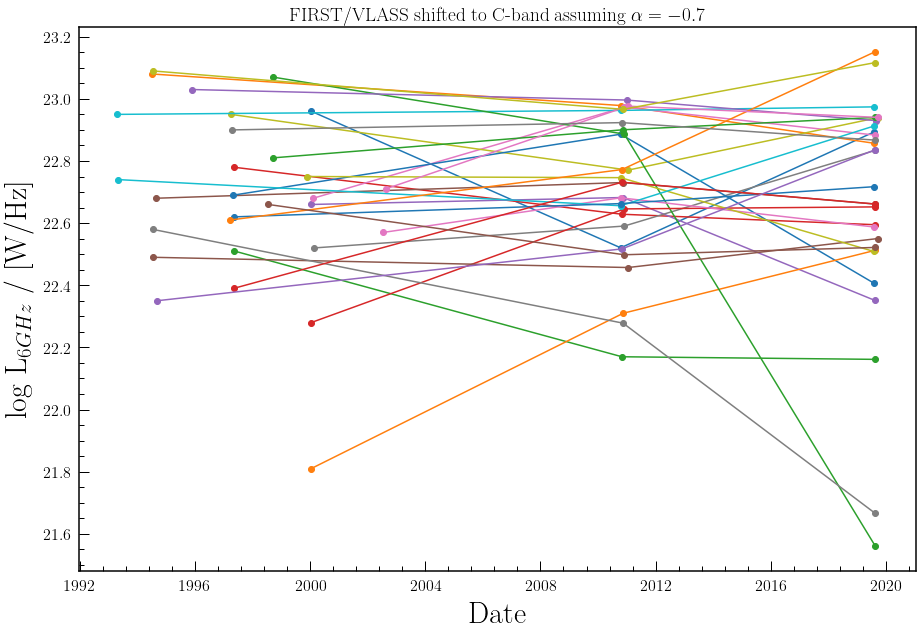

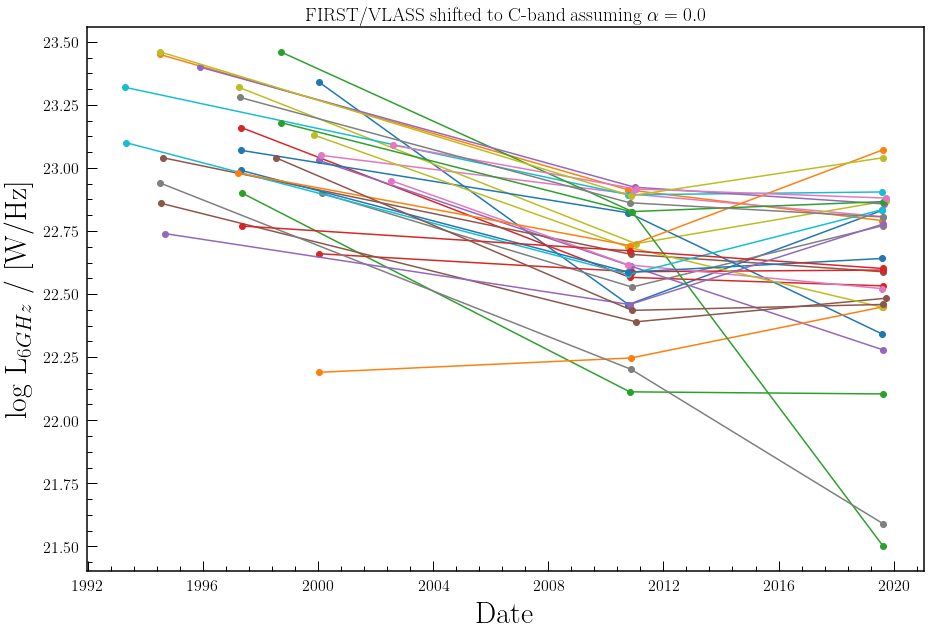

In [34]:
fig = plt.figure(figsize=(15,10))

for i in range(len(var_data)):
    plt.plot(dates[i,:], var_data[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(len(var_data)):
    plt.plot(dates[i,:], var_dataup[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

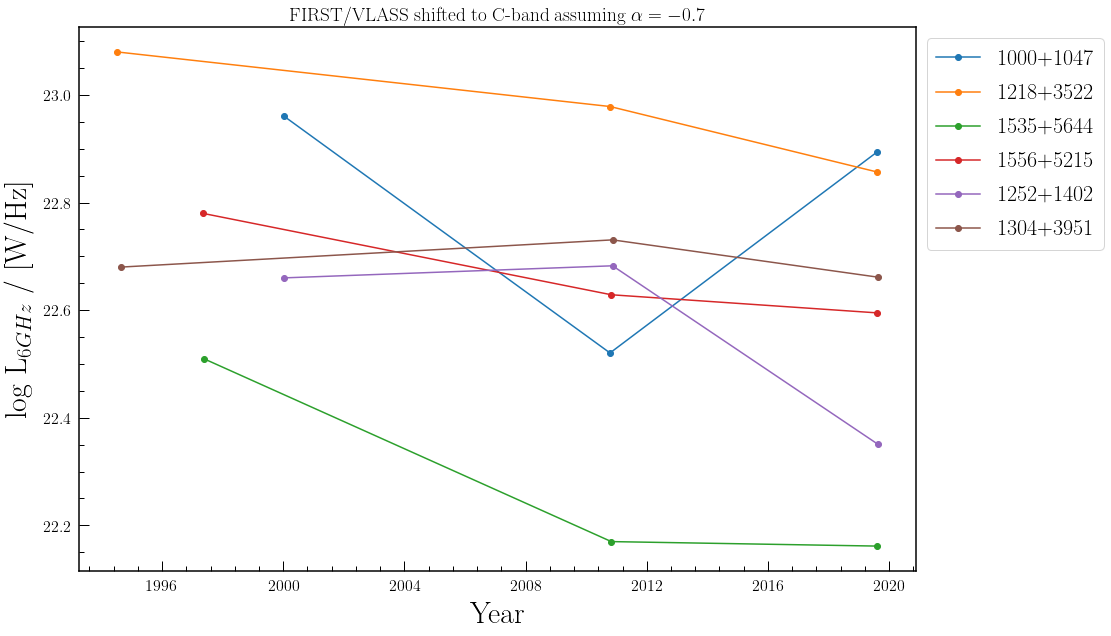

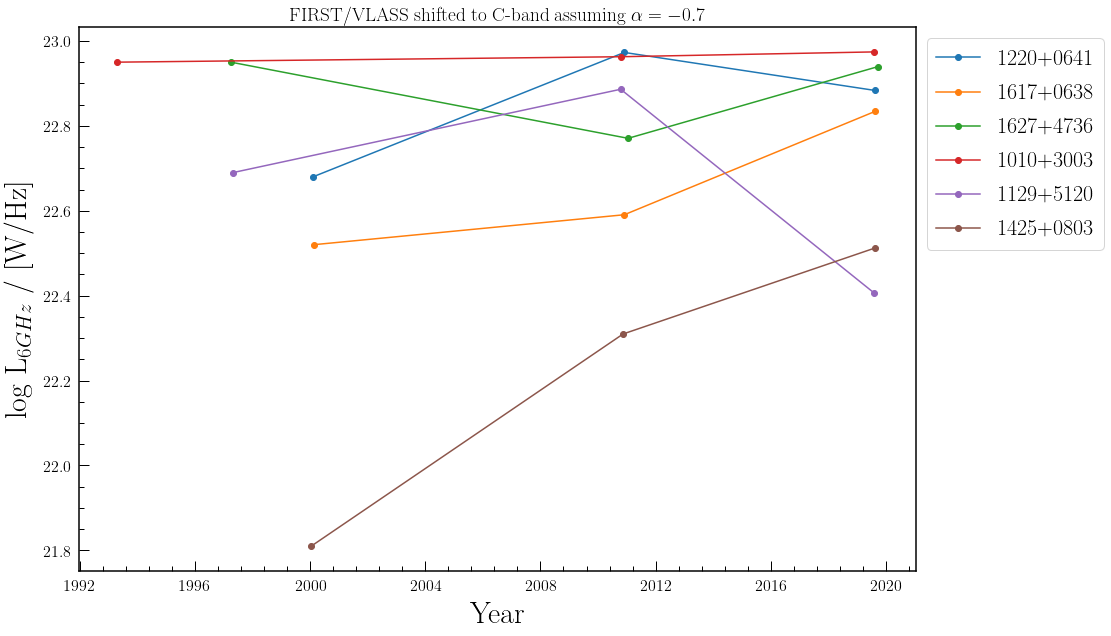

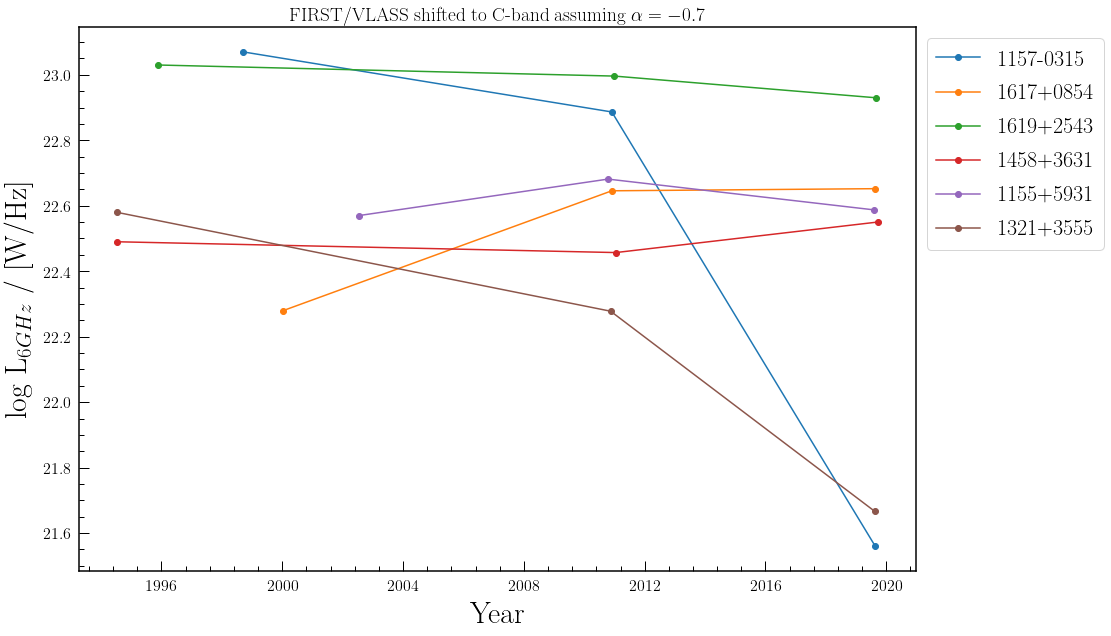

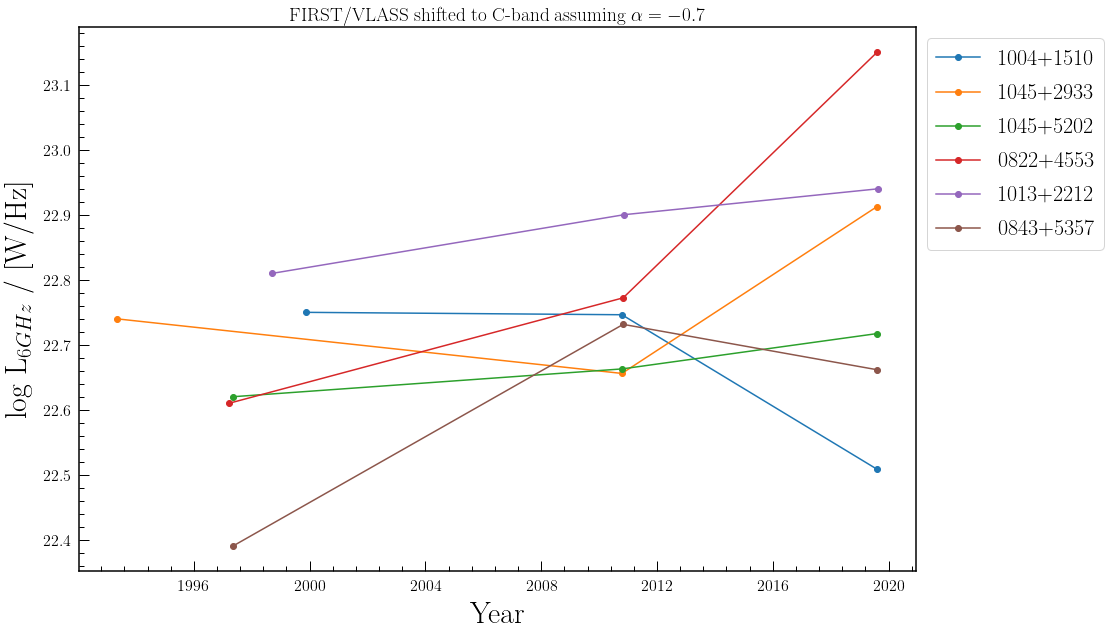

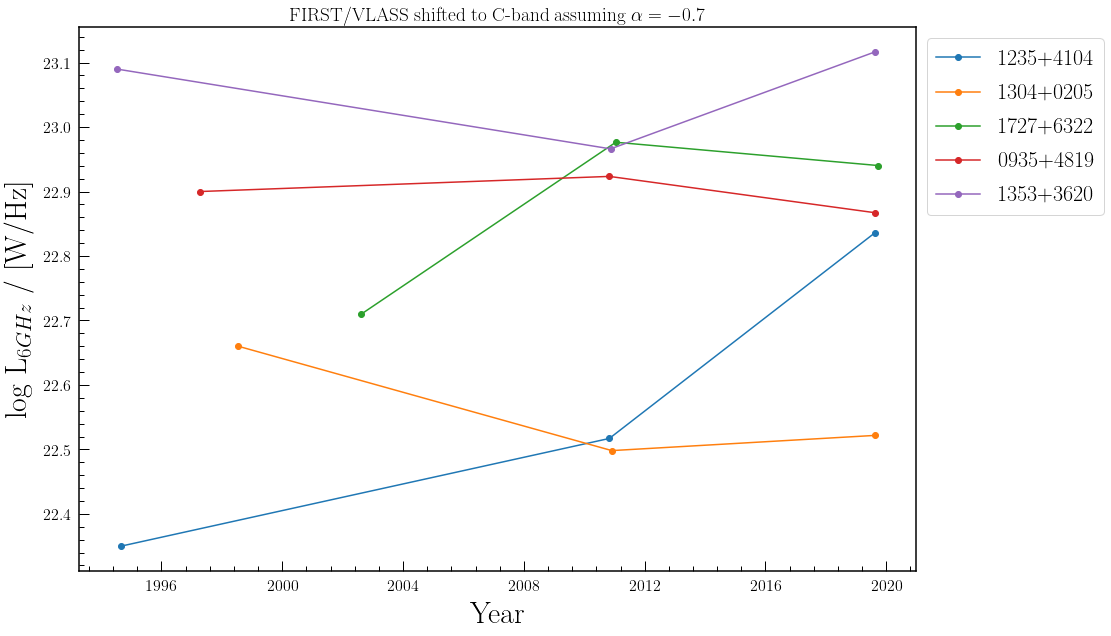

In [35]:
fig = plt.figure(figsize=(15,10))
plt.xlabel("Year", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")


for i in range(len(var_data)):
    plt.plot(dates[i,:], var_data[i,:], "-o", label=var_names[i])
    if (i+1)%6==0:
        plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
        plt.show()
        fig = plt.figure(figsize=(15,10))
        plt.xlabel("Year", fontsize=30)
        plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
        plt.title("FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
        


#plt.ylim(21.6,23.25)
plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

VLASS (2018 observations) have inherent uncertainties up to 20%

In [36]:
dates[0,:]

array([datetime.date(2000, 1, 15), datetime.date(2010, 10, 15),
       datetime.date(2019, 8, 4)], dtype=object)



## Radio-loud QSO Variability

In [37]:
louds = pd.read_csv("loud_qsos_radeccoords.csv")

loud_names = louds[["Name"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]

L6loud_first = louds[["L6_FIRST"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]
L6loud_firstup = louds[["L6_FIRST_alpha0"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]

#Only want peak flux densities for louds
L6loud_2011 = radluminosity(6., 6., louds[["S(6)_p"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0], -0.7, louds[["z"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0])
L6loud_2011up = radluminosity(6., 6., louds[["S(6)_p"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0], 0.0, louds[["z"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0])

L6loud_vlass = louds[["L6_VLASS"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]
L6loud_vlassup = louds[["L6_VLASS_alpha0"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]

loudvdata = np.array([L6loud_first, L6loud_2011, L6loud_vlass])
var_loud = loudvdata.T

loudvdata_up = np.array([L6loud_firstup, L6loud_2011up, L6loud_vlassup])
var_loudup = loudvdata_up.T

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered i

In [38]:
louds

Name           RA         DEC.      z  L6_FIRST  \
0   083353.88+422401.8  08 33 53.88  +42 24 01.8  0.249     25.16   
1   084347.84+203752.4  08 43 47.84  +20 37 52.4  0.227     23.17   
2   085632.99+595746.8  08 56 32.99  +59 57 46.8  0.283     24.32   
3   091928.69+143202.6  09 19 28.69  +14 32 02.6  0.207       NaN   
4   092837.98+602521.0  09 28 37.98  +60 25 21.0  0.295     24.03   
5   093200.07+553347.4  09 32 00.07  +55 33 47.4  0.266     23.56   
6   095407.02+212235.9  09 54 07.02  +21 22 35.9  0.295     24.32   
7   095539.83+453217.0  09 55 39.83  +45 32 17.0  0.259       NaN   
8   100726.10+124856.2  10 07 26.10  +12 48 56.2  0.241     23.89   
9   111121.71+482045.9  11 11 21.71  +48 20 45.9  0.281     24.08   
10  112952.99+221520.0  11 29 52.99  +22 15 20.0  0.291     24.48   
11  113109.48+311405.4  11 31 09.48  +31 14 05.4  0.290       NaN   
12  122011.88+020342.2  12 20 11.88  +02 03 42.2  0.240     25.28   
13  122539.55+245836.3  12 25 39.55  +24 58 36.3  0.268     23.69   
14  140336.43+174136.1  14 03 36.43  +17 41 36.1  0.222     24.01   
15  145331.47+264946.7  14 53 31.47  +26 49 46.7  0.279     24.06   
16  152757.67+223304.0  15 27 57.67  +22 33 04.0  0.254       NaN   
17  154743.53+205216.6  15 47 43.53  +20 52 16.6  0.265     24.41   

    L6_FIRST_alpha0  DATE_FIRST  L6_VLASS  L6_VLASS_alpha0  DATE_VLASS  \
0             25.54  1995-12-19     25.30            25.45  2019-05-24   
1             23.55  1998-10-15     23.45            23.60  2019-04-13   
2             24.67  2002-07-15     24.91            25.05  2017-09-25   
3               NaN         NaN       NaN              NaN         NaN   
4             24.39  2002-07-15     24.09            24.22  2017-09-18   
5             23.93  1997-05-15     23.77            23.91  2017-09-23   
6             24.68  1998-09-15     24.65            24.78  2019-04-19   
7               NaN         NaN       NaN              NaN         NaN   
8             24.26  1999-12-15     24.34            24.48  2017-10-06   
9             24.45  1997-04-10     24.30            24.43  2019-05-10   
10            24.84  1996-01-15     24.35            24.48  2019-04-19   
11              NaN         NaN       NaN              NaN         NaN   
12            25.66  1998-07-15     25.56            25.71  2019-05-14   
13            24.06  1995-12-05     23.86            24.00  2017-11-24   
14            24.39  1999-11-15     24.35            24.50  2019-04-01   
15            24.43  1995-11-10     24.02            24.15  2017-11-12   
16              NaN         NaN       NaN              NaN         NaN   
17            24.78  1998-10-15     24.62            24.76  2017-09-26   

     DATE_VLAC    S(6)_p     pmp  
0   2010-11-15  209000.0  6270.1  
1   2010-11-15    5361.0   161.6  
2   2010-11-30   35614.0  1068.6  
3          NaN     265.0    60.5  
4   2010-10-15    8943.0   268.8  
5   2010-10-31    5153.0   155.9  
6    2010-12-1   36080.0   790.0  
7          NaN   13300.0   399.2  
8   2010-12-15   14237.0   429.8  
9   2010-12-16    8132.0   245.2  
10  2010-12-17   17013.0   510.9  
11         NaN  122500.0  3675.2  
12  2011-01-17  322000.0  9660.3  
13    2011-1-2    9492.0   285.1  
14    2011-1-3   17890.0   537.2  
15    2011-1-4    6053.0   247.4  
16         NaN   49700.0  1492.0  
17  2010-11-30   51414.0  1555.3

In [39]:
loud_datefirst = louds[["DATE_FIRST"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]
loud_date2011 = louds[["DATE_VLAC"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]
loud_datevlass = louds[["DATE_VLASS"]].values.flatten()[louds[["L6_FIRST"]].values.flatten()>0]

louddts = np.array([loud_datefirst, loud_date2011, loud_datevlass])
dates_loud = louddts.T

for i in range(dates_loud.shape[0]): #format dates for plotting
    for j in range(dates_loud.shape[1]):
        dates_loud[i,j] = dt.datetime.strptime(dates_loud[i,j],'%Y-%m-%d').date()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


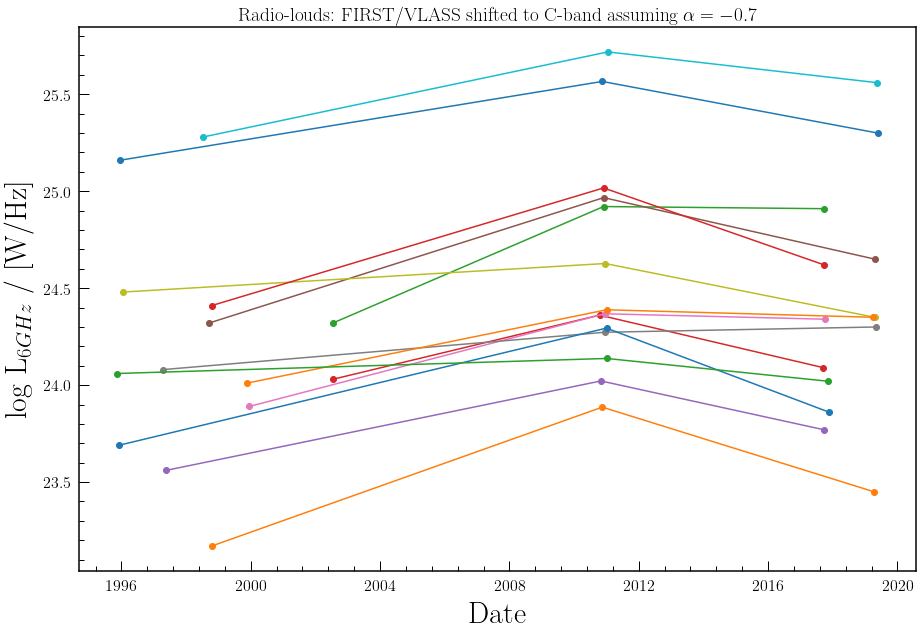

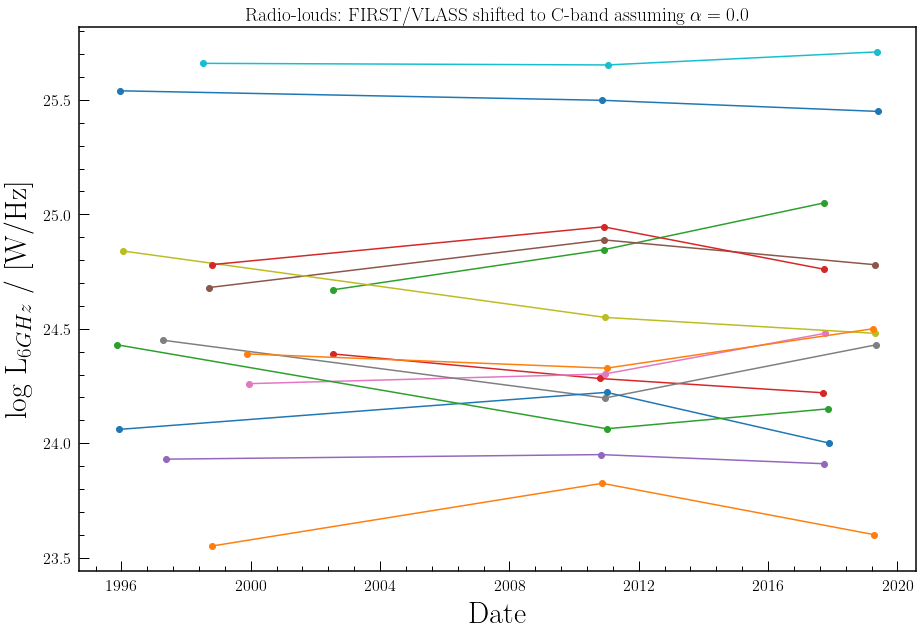

In [40]:
fig = plt.figure(figsize=(15,10))

for i in range(len(var_loud)):
    plt.plot(dates_loud[i,:], var_loud[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Radio-louds: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(len(var_loudup)):
    plt.plot(dates_loud[i,:], var_loudup[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Radio-louds: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

Interesting.  Does $\alpha=0.0$ actually suit the loud data better?  We know there's some compact opaque core dominating the radio in these objects, so it would make sense if that were the case, but we see above how that choice of spectral index is not at all suitable for the RQQs...  $\rightarrow$ starburst (or something else)?

### Radio-intermediate QSOs

In [41]:
mids = pd.read_csv("intermediate_qsos_radeccoords.csv")

mid_names = mids[["Name"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]

L6mid_first = mids[["L6_FIRST"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]
L6mid_firstup = mids[["L6_FIRST_alpha0"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]

#Only want peak flux densities for mids
L6mid_2011 = radluminosity(6., 6., mids[["S(6)_p"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0], -0.7, mids[["z"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0])
L6mid_2011up = radluminosity(6., 6., mids[["S(6)_p"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0], 0.0, mids[["z"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0])

L6mid_vlass = mids[["L6_VLASS"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]
L6mid_vlassup = mids[["L6_VLASS_alpha0"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]

midvdata = np.array([L6mid_first, L6mid_2011, L6mid_vlass])
var_mid = midvdata.T

midvdata_up = np.array([L6mid_firstup, L6mid_2011up, L6mid_vlassup])
var_midup = midvdata_up.T

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered i

In [42]:
mid_datefirst = mids[["DATE_FIRST"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]
mid_date2011 = mids[["DATE_VLAC"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]
mid_datevlass = mids[["DATE_VLASS"]].values.flatten()[mids[["L6_FIRST"]].values.flatten()>0]

middts = np.array([mid_datefirst, mid_date2011, mid_datevlass])
dates_mid = middts.T

for i in range(dates_mid.shape[0]): #format dates for plotting
    for j in range(dates_mid.shape[1]):
        dates_mid[i,j] = dt.datetime.strptime(dates_mid[i,j],'%Y-%m-%d').date()

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until


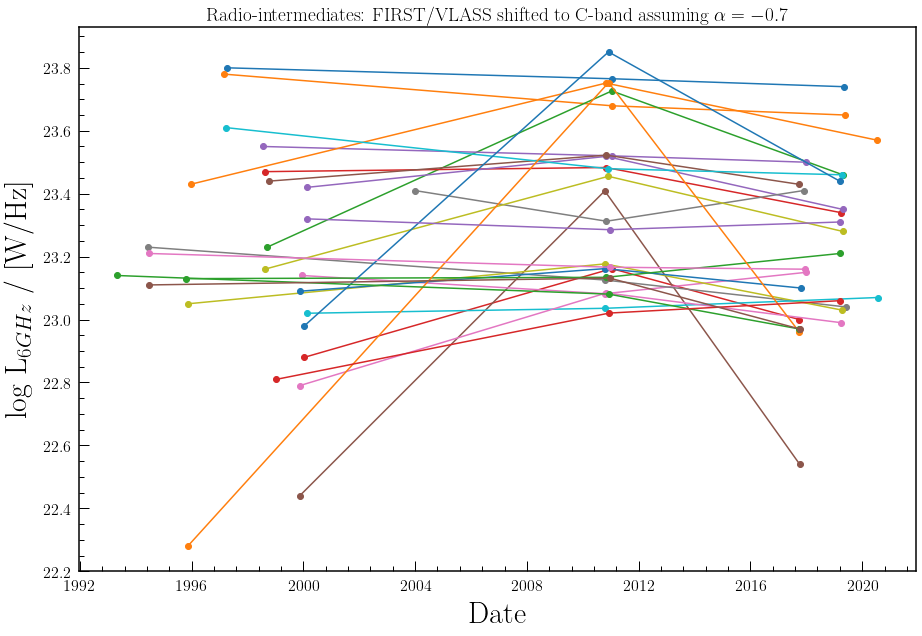

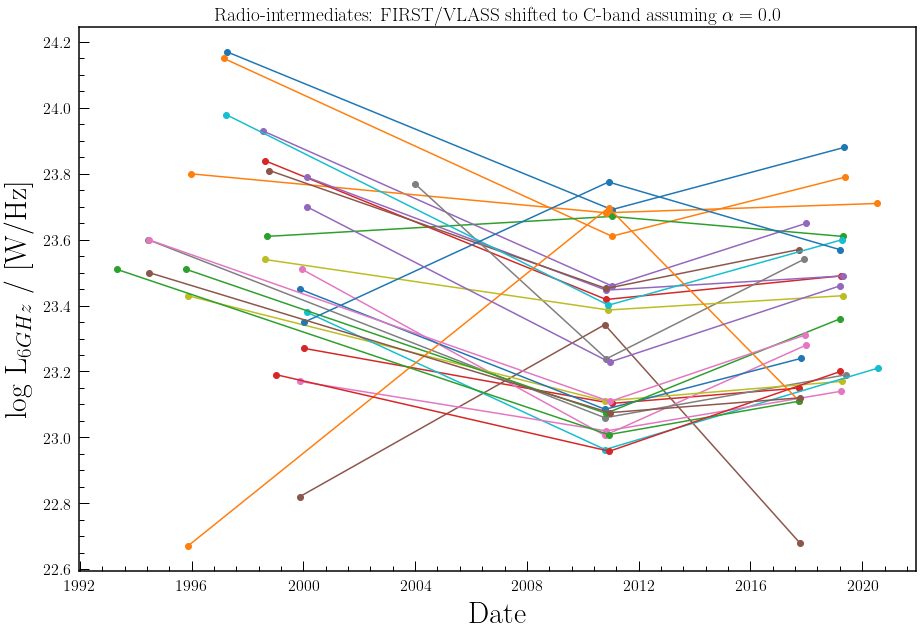

In [43]:
fig = plt.figure(figsize=(15,10))

for i in range(len(var_mid)):
    plt.plot(dates_mid[i,:], var_mid[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Radio-intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()



fig = plt.figure(figsize=(15,10))

for i in range(len(var_midup)):
    plt.plot(dates_mid[i,:], var_midup[i,:], "-o")

plt.xlabel("Date", fontsize=30)
plt.ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
plt.title("Radio-intermediates: FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)
#plt.legend(bbox_to_anchor=(1.,1.), prop={'size': 22.2})
#plt.tight_layout()
#plt.savefig("PaperPlots/var_first_vlass.pdf")
plt.show()

Test which spectral index fits better for the radio-*quiet* sources

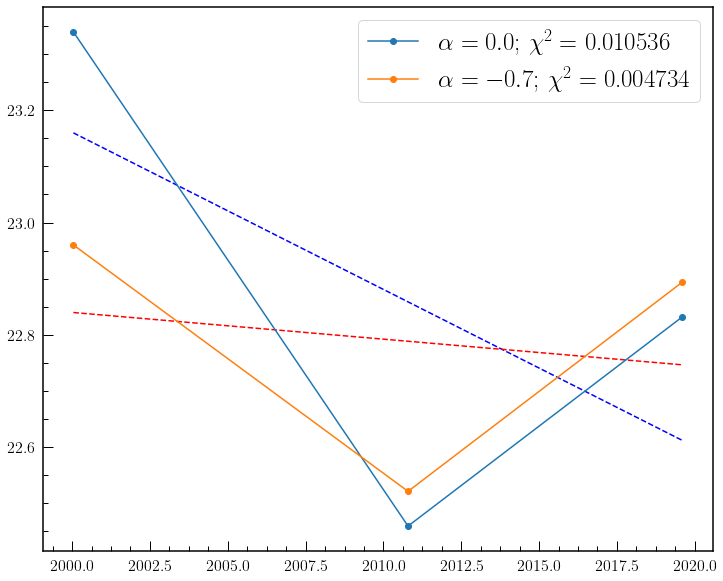

In [44]:
fig = plt.figure(figsize=(12,10))

#convert dates to decimal yrs to pass to fit
dates_fit = np.array([]).reshape(0,3)
for i in range(len(dates)):
    dates_fit_i = np.zeros(len(dates[i]))
    for j in range(len(dates[i])):
        dates_fit_i[j] = dates[i][j].year+(dates[i][j].month-1)/12+dates[i][j].day/365.25
    dates_fit = np.vstack((dates_fit, dates_fit_i))

    
fit1 = np.polyfit(dates_fit[0,:], var_data[0,:],1)
fit2 = np.polyfit(dates_fit[0,:], var_dataup[0,:],1)
y0 = fit2[0]*dates_fit[0,:] + fit2[1]
y7 = fit1[0]*dates_fit[0,:] + fit1[1]
plt.plot(dates_fit[0,:], y0, '--b')
plt.plot(dates_fit[0,:], y7, '--r')

chisq_alpha0 = spstats.chisquare(var_dataup[0,:], y0)
chisq_alphaminp7 = spstats.chisquare(var_data[0,:], y7)
chisq_alpha0[0], chisq_alphaminp7[0]

plt.plot(dates_fit[0,:], var_dataup[0,:], "-o", label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
plt.plot(dates_fit[0,:], var_data[0,:], "-o", label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
plt.legend(loc="best", prop={"size": 25})

So, according to this, $\alpha=-0.7$ is a better choice of spectral index for this source.  Now want to do this with all of our targets in the analysis.

/Users/trevormccaffrey/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


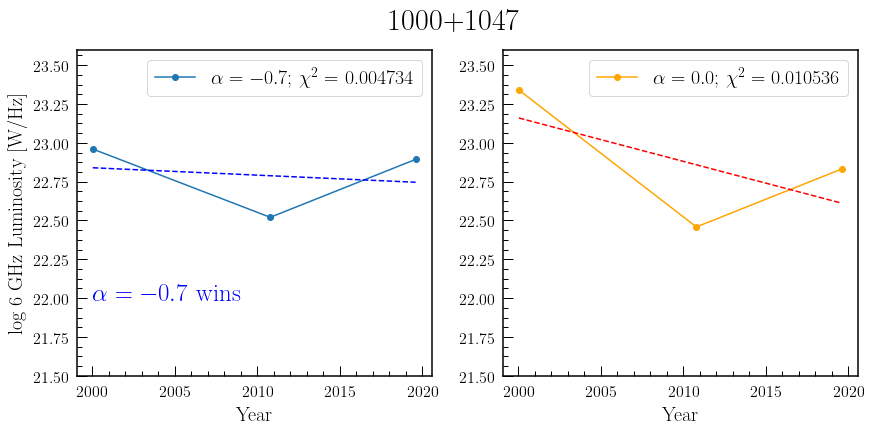

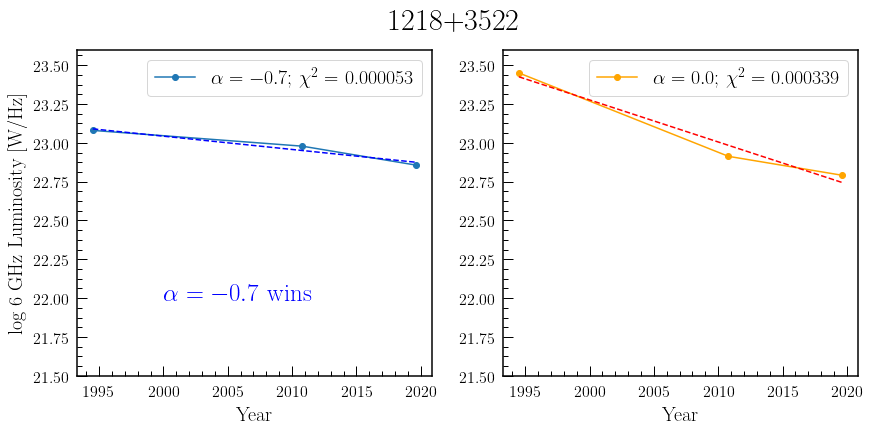

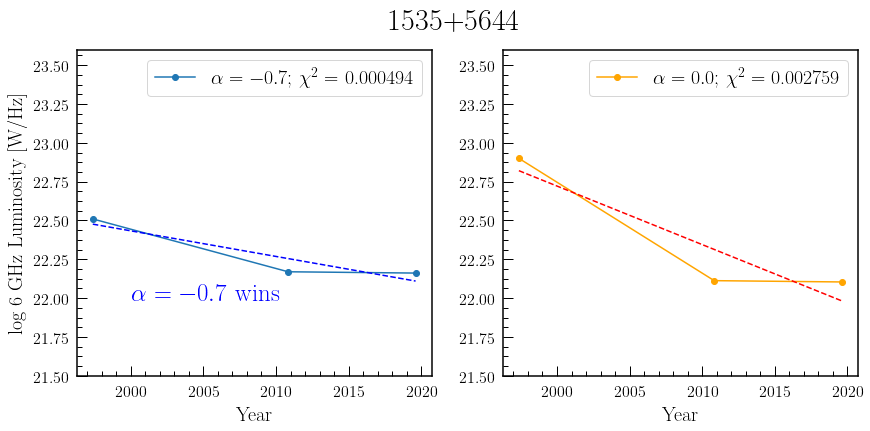

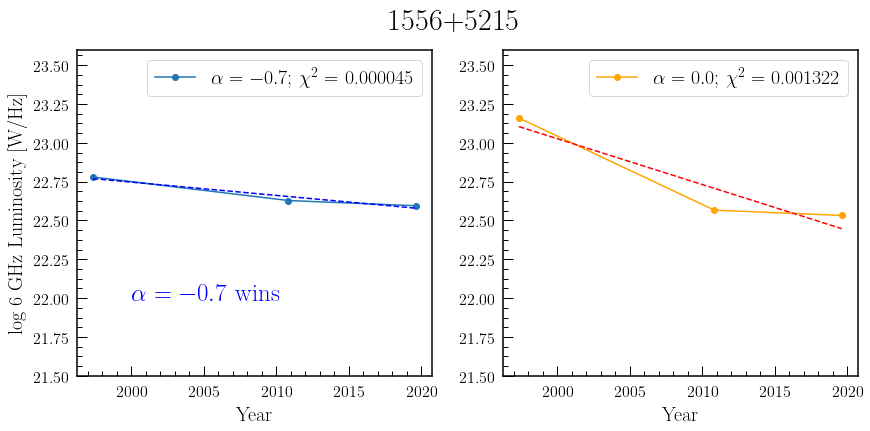

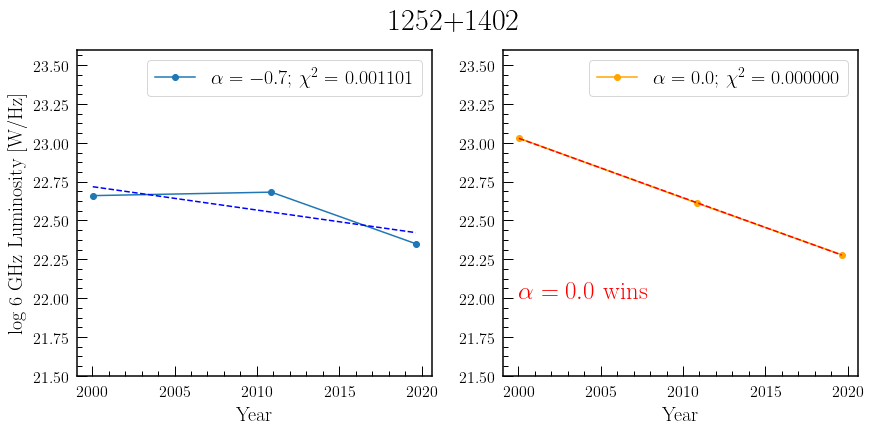

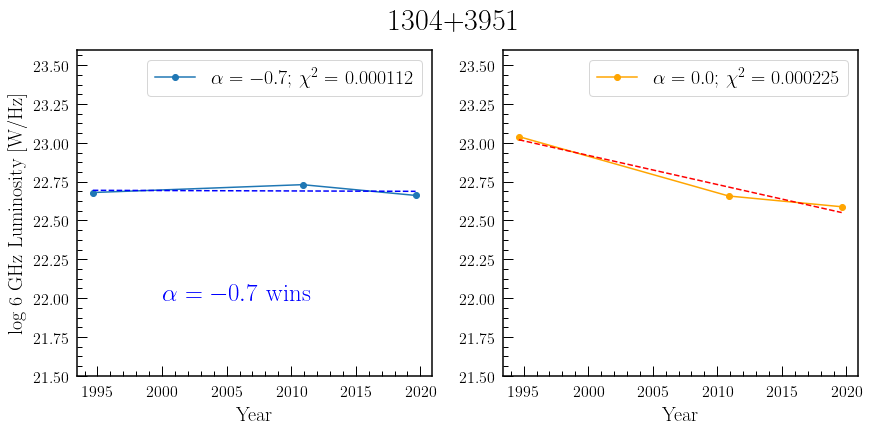

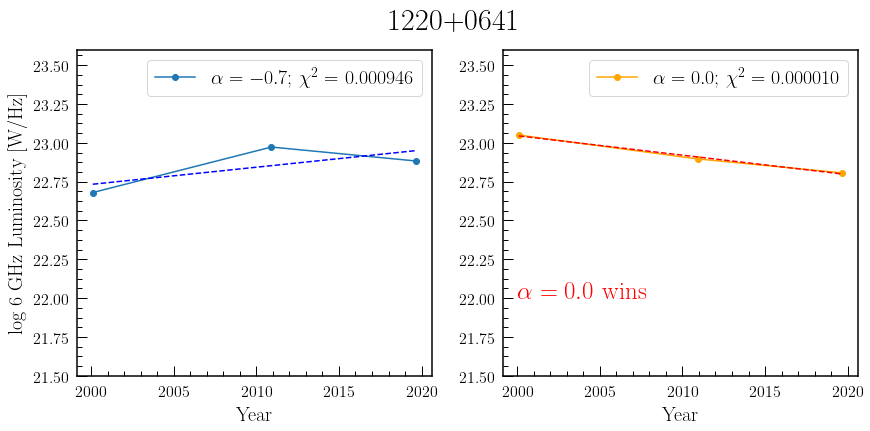

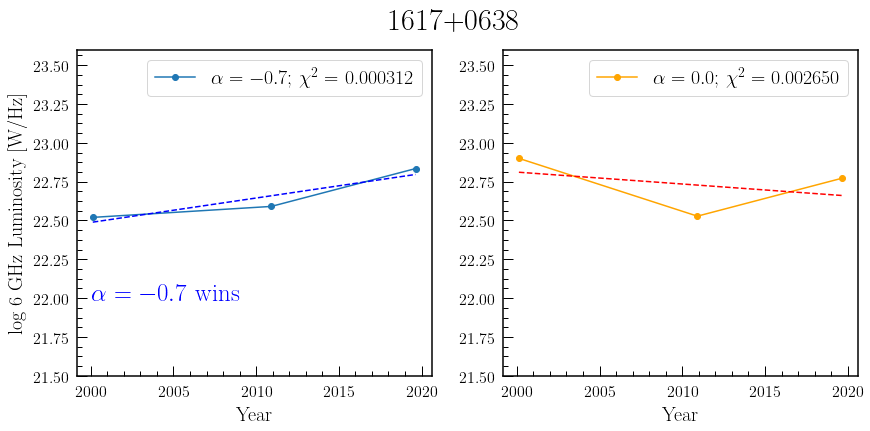

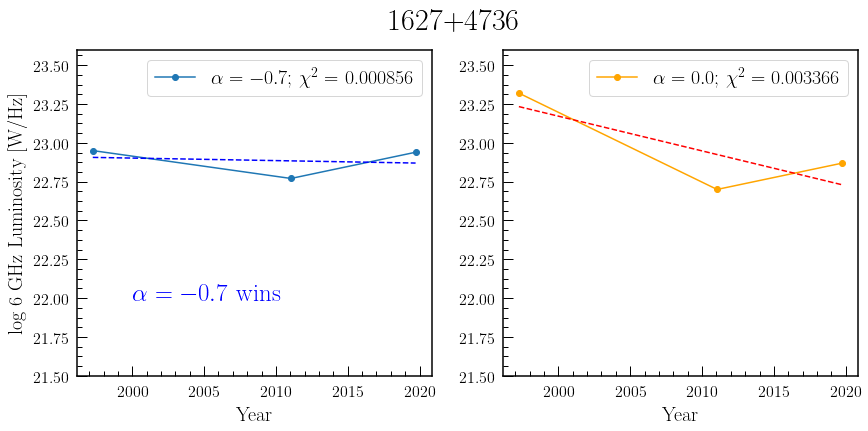

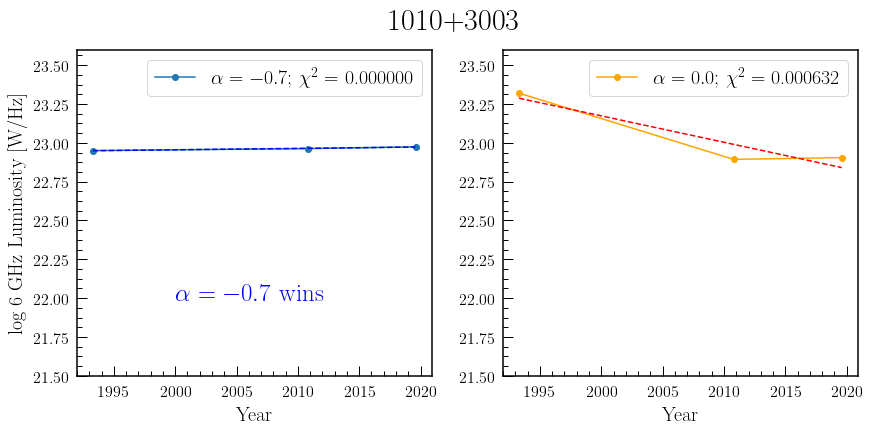

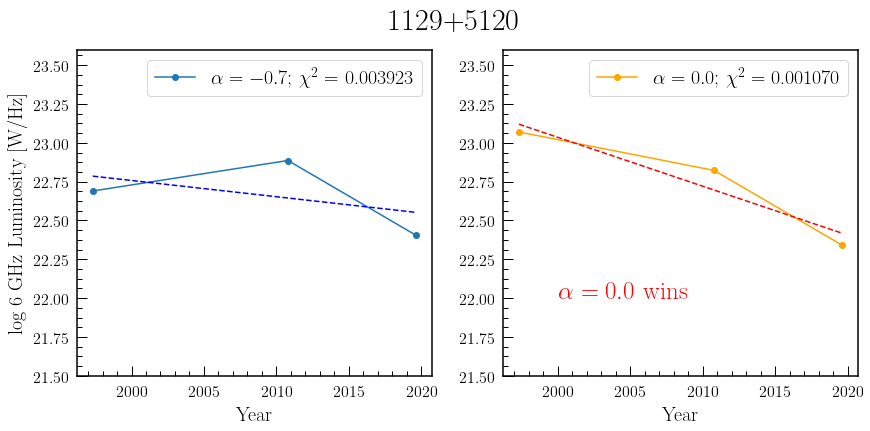

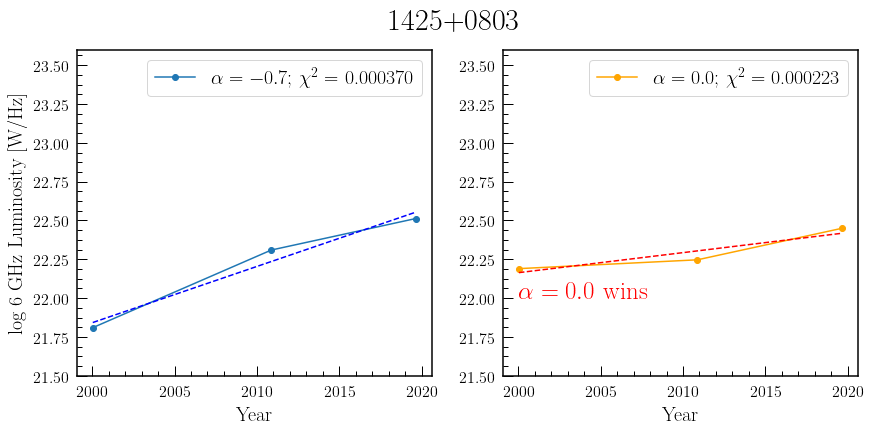

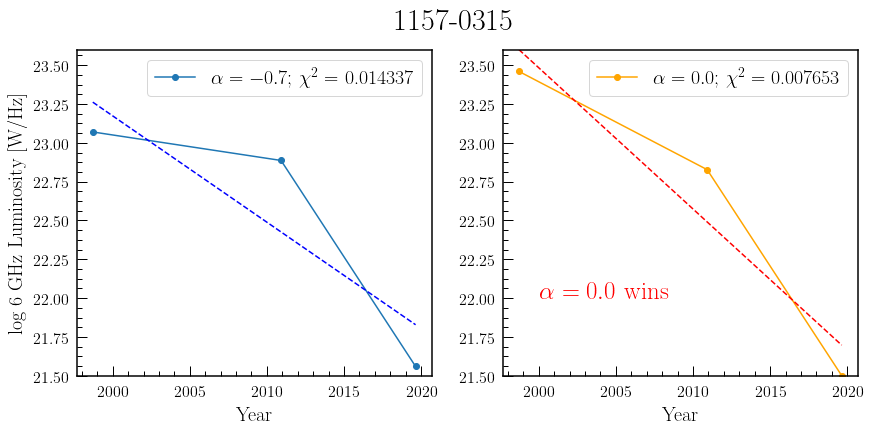

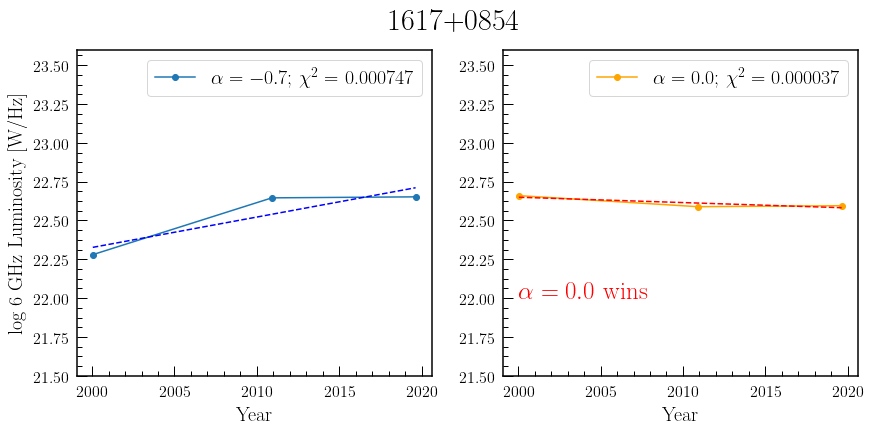

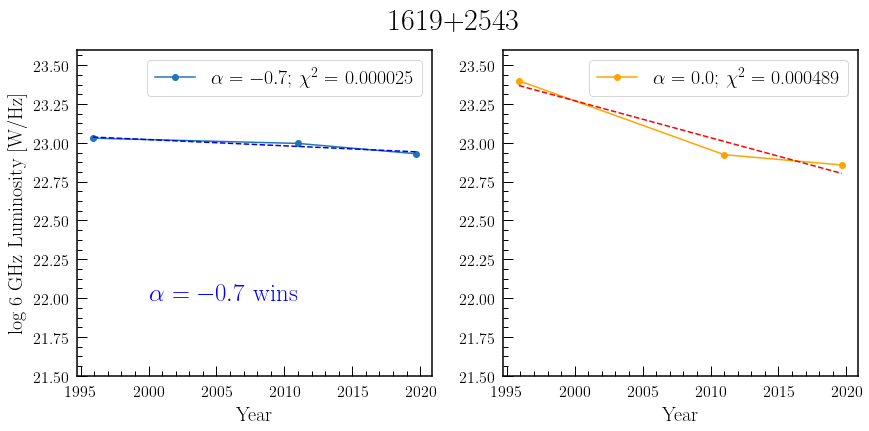

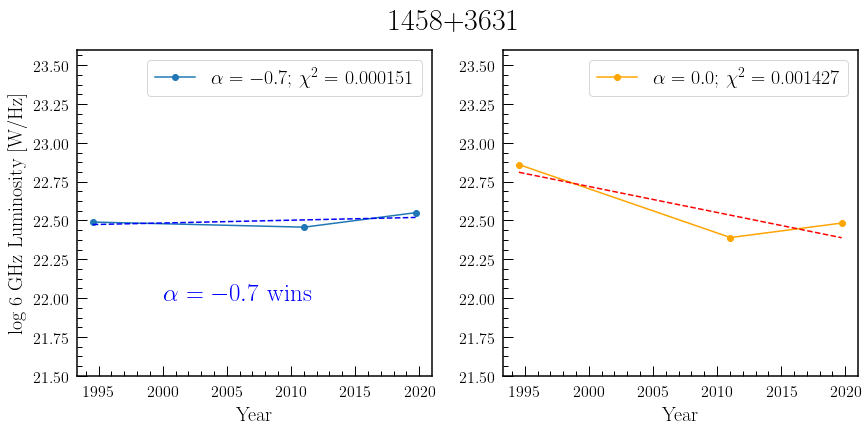

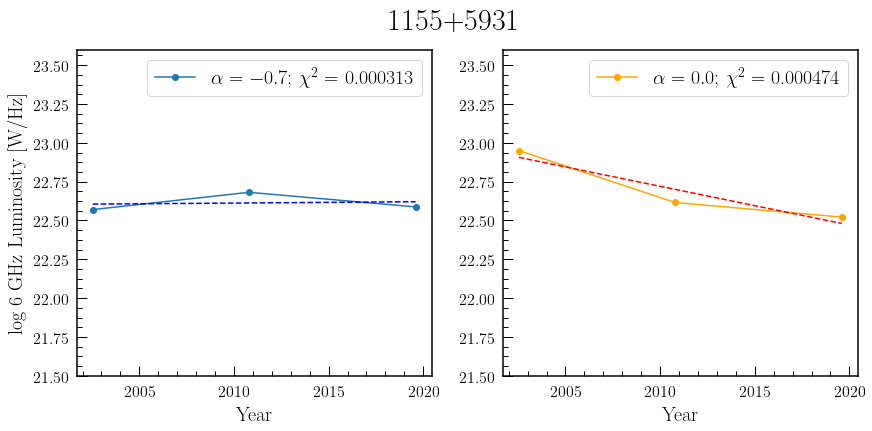

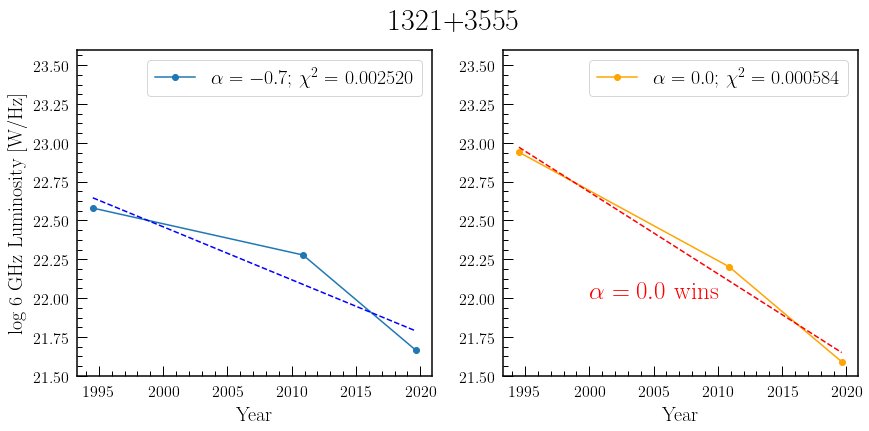

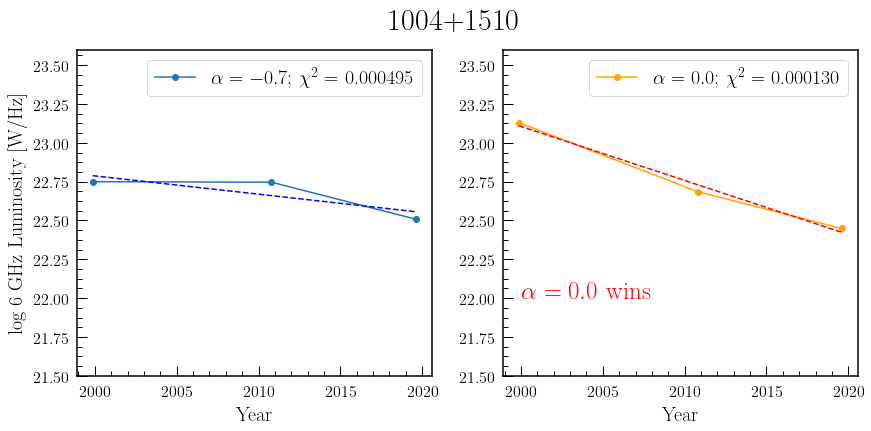

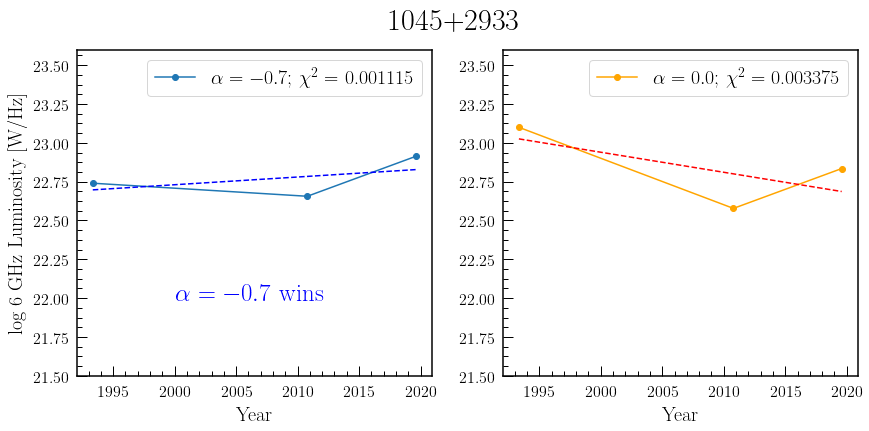

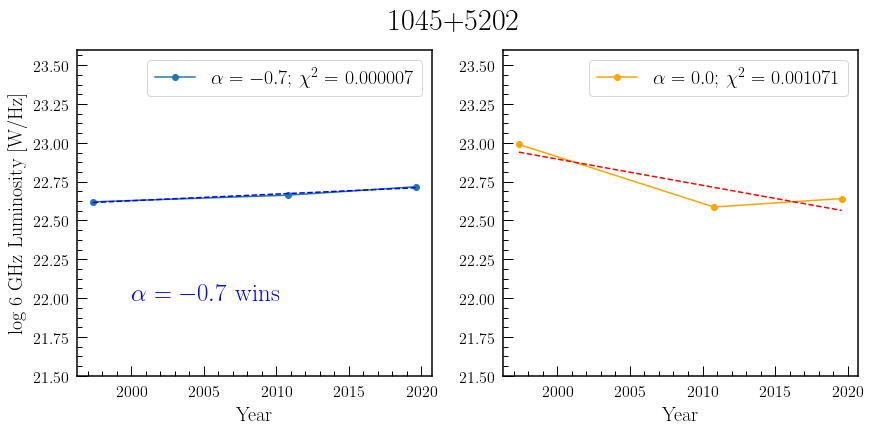

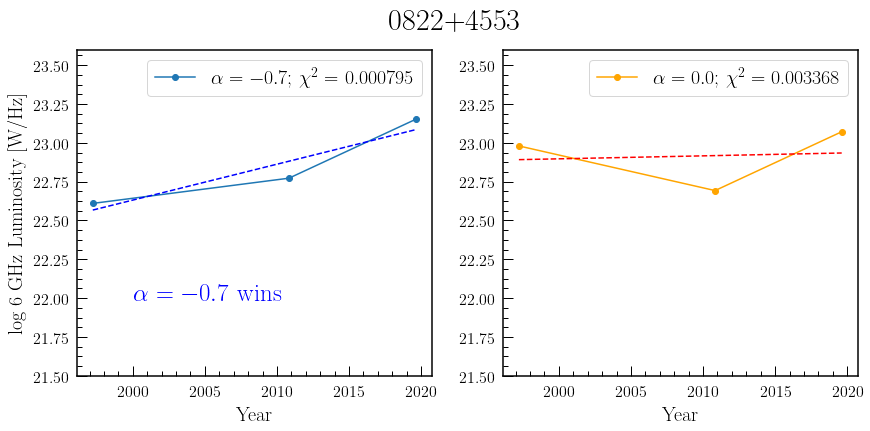

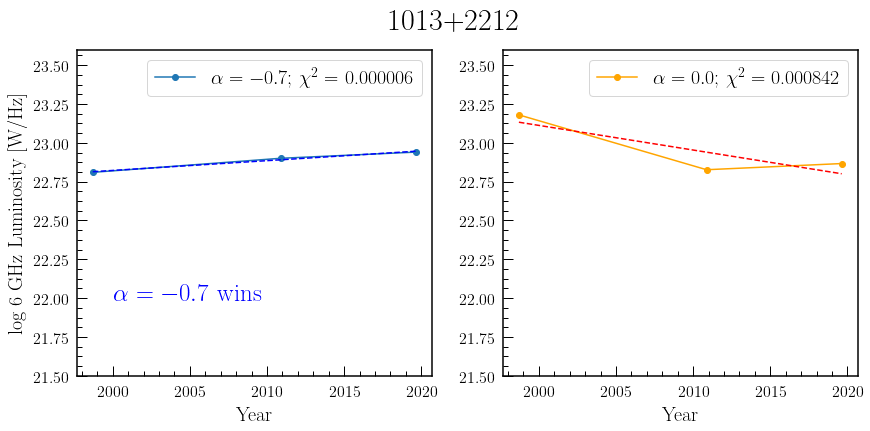

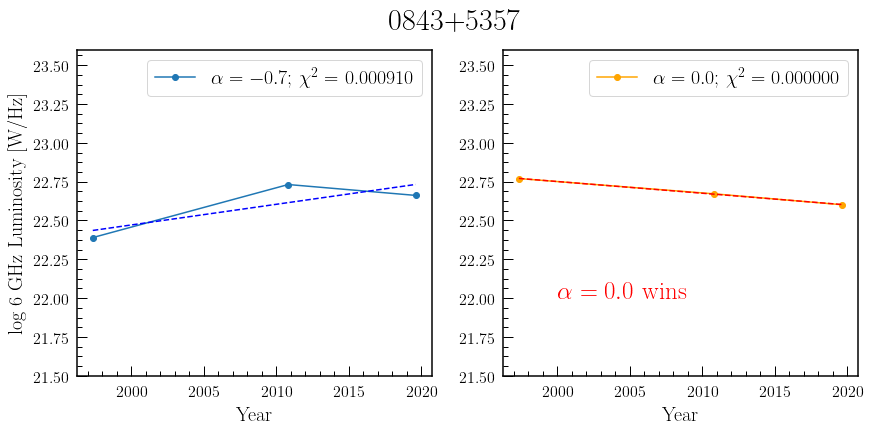

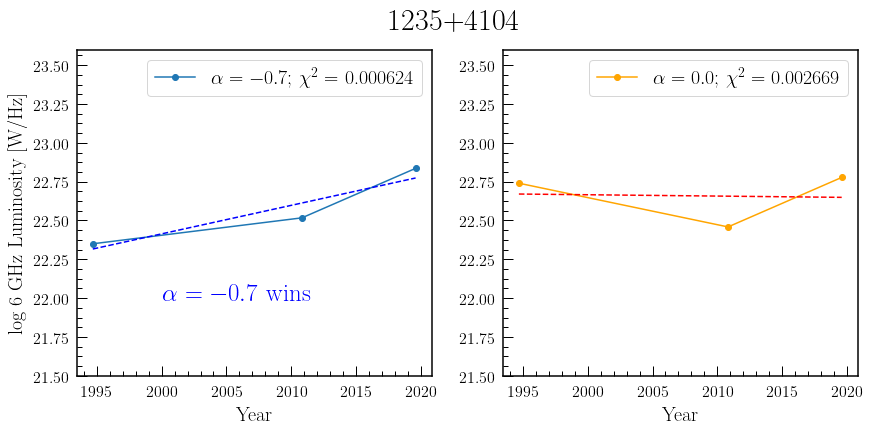

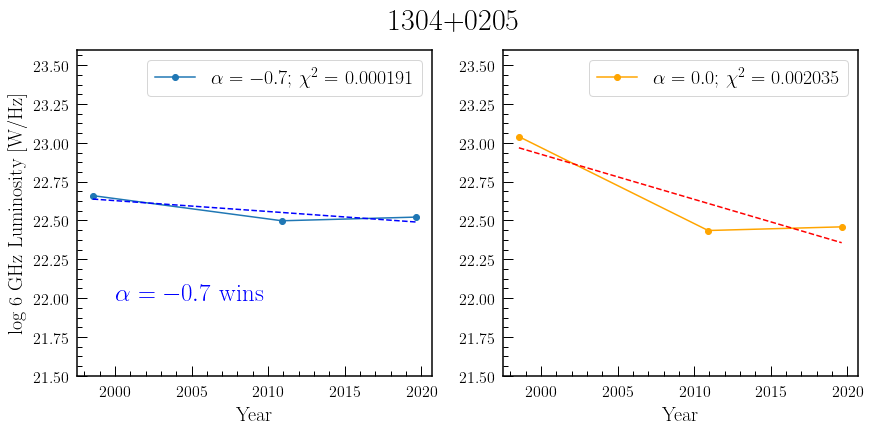

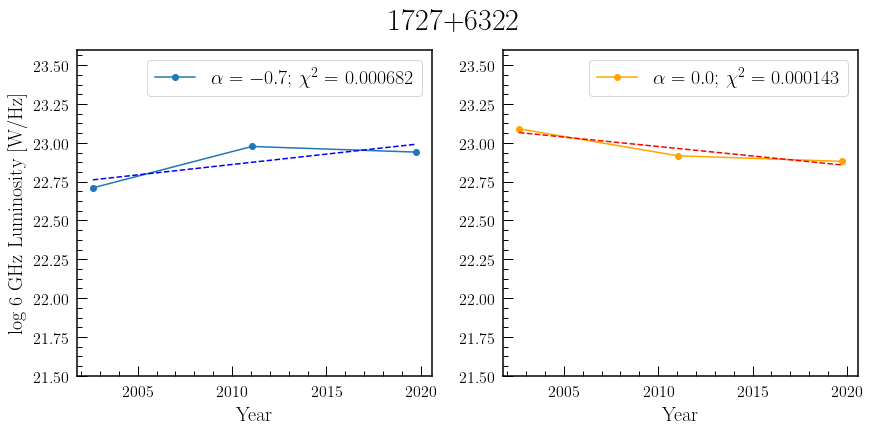

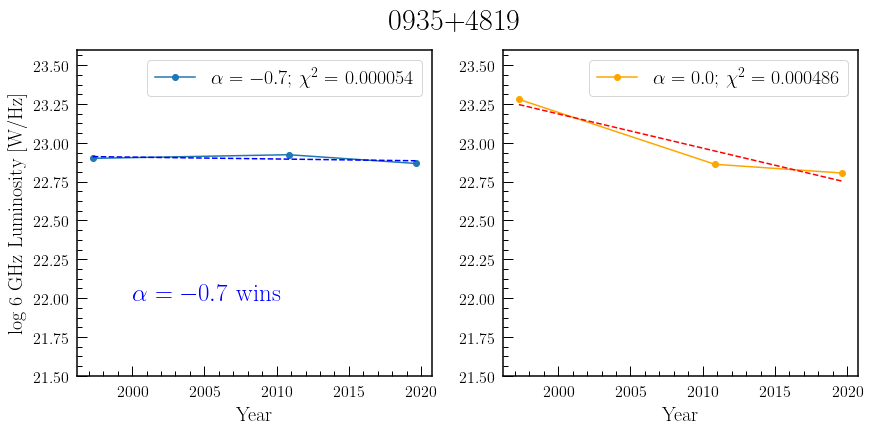

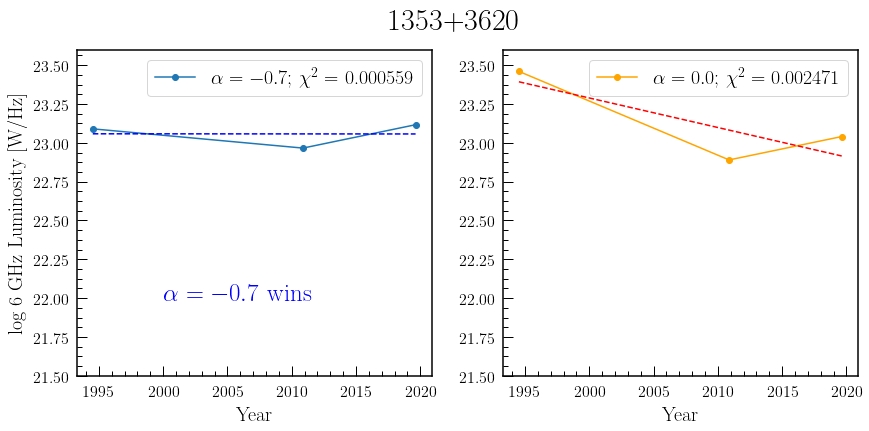

Radio-quiet spectral index counts:

alpha=0.0 : 10
alpha=-0.7: 19


In [45]:
num0 = 0
num7 = 0

#Store best spectral indices for each target based on chi squared
rq_indices = np.array([])
rqq_alpha = np.ones(len(L6))
for i in range(len(L6)):
    if df[["L6_FIRST"]].values.flatten()[i]>0:
        rq_indices = np.append(rq_indices, i)
        

for i in range(len(var_data)):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_fit[i,:], var_dataup[i,:],1) 
    fit_alphaminp7 = np.polyfit(dates_fit[i,:], var_data[i,:],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_fit[i,:] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_fit[i,:] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(var_dataup[i,:], y0)
    chisq_alphaminp7 = spstats.chisquare(var_data[i,:], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,22), color="blue", size=25)
        rqq_alpha[int(rq_indices[int(i)])] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,22), color="red", size=25)
        rqq_alpha[int(rq_indices[int(i)])] = 0.0
    
    #plot true luminosities and their fits for each alpha side by side
    axs[0].plot(dates_fit[i,:], var_data[i,:], "-o", label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_fit[i,:], y7, '--b')
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(21.5, 23.6)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].plot(dates_fit[i,:], var_dataup[i,:], "-o", color="orange", label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_fit[i,:], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(21.5, 23.6)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(var_names[i], fontsize=30)
    plt.show()
    
print("Radio-quiet spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)

Now what do the variability plots for each choice of spectral index look like as a whole?

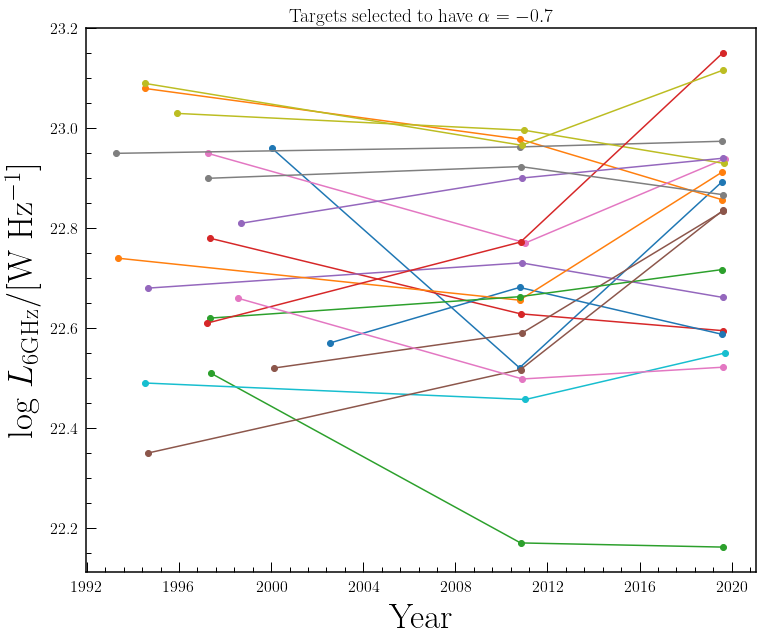

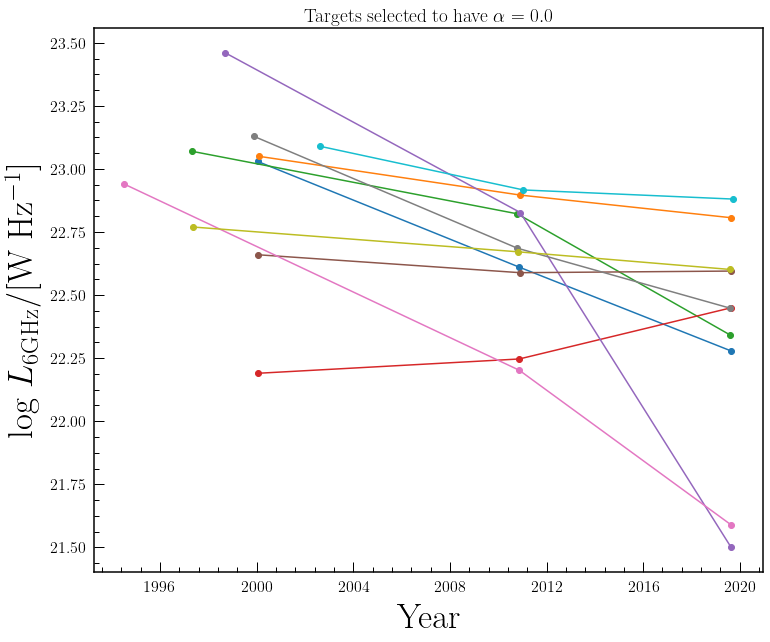

In [46]:
fig = plt.figure(figsize=(12,10))
for i in range((rqq_alpha==-0.7).sum()):
    plt.plot(dates[rqq_alpha[rqq_alpha!=1.]==-0.7][i,:], var_data[rqq_alpha[rqq_alpha!=1.]==-0.7][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=-0.7$")    
plt.show()

fig = plt.figure(figsize=(12,10))
for i in range((rqq_alpha==0.0).sum()):
    plt.plot(dates[rqq_alpha[rqq_alpha!=1.]==0.0][i,:], var_dataup[rqq_alpha[rqq_alpha!=1.]==0.0][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=0.0$")
plt.show()

Sort of skeptical after seeing all of the $\alpha=0.0$ sources consistently decreasing.  Maybe this is a good indicator of which sources are decreasing from resolved out emission, not necessarily variability?

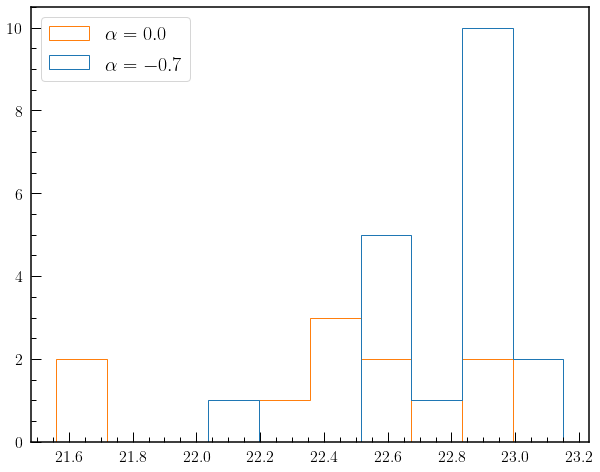

In [47]:
fig = plt.figure(figsize=(10,8))

plt.hist([L6[rqq_alpha==-0.7], L6[rqq_alpha==0.0]], histtype="step", 
         label=["$\\alpha=-0.7$", "$\\alpha=0.0$"])

plt.legend(loc="upper left", prop={"size": 20})

df["Chisq Alpha"] = rqq_alpha
df.to_csv("RQQfigs.csv", index=False)

In [48]:
a = np.array([1,2,3])
a[2]=55
a

array([ 1,  2, 55])

#### Now check spectral indices for the intermediate sources

In [49]:
#convert dates_mid to decimal yrs to pass to fit
dates_mid_fit = np.array([]).reshape(0,3)
for i in range(len(dates_mid)):
    dates_mid_fit_i = np.zeros(len(dates_mid[i]))
    for j in range(len(dates_mid[i])):
        dates_mid_fit_i[j] = dates_mid[i][j].year+(dates_mid[i][j].month-1)/12+dates_mid[i][j].day/365.25
    dates_mid_fit = np.vstack((dates_mid_fit, dates_mid_fit_i))

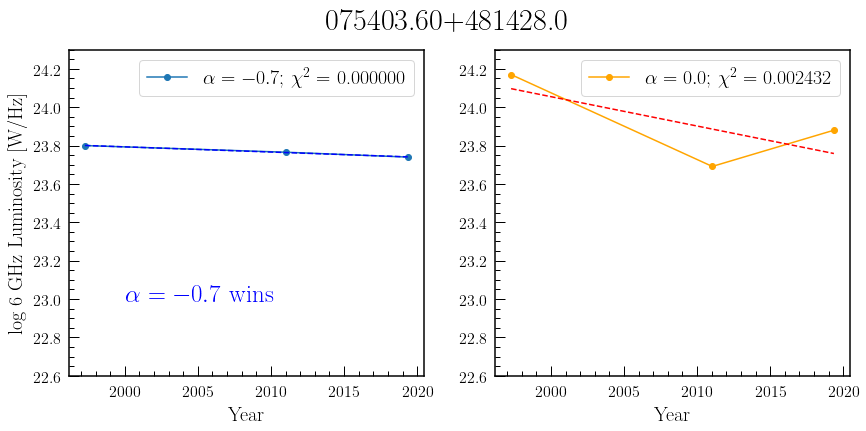

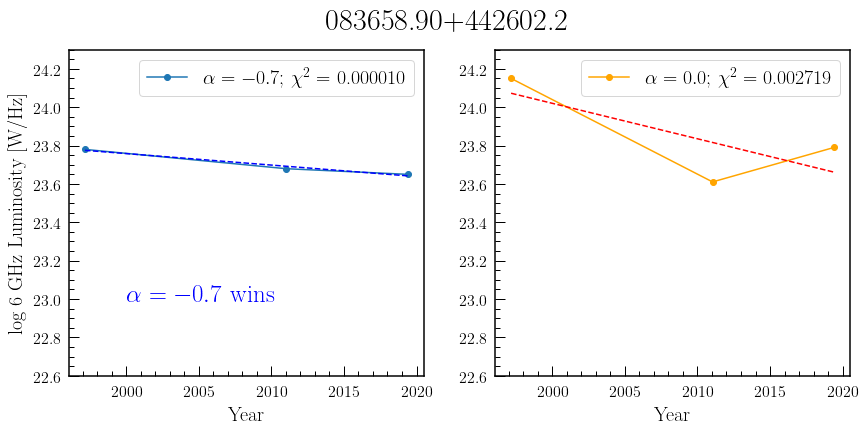

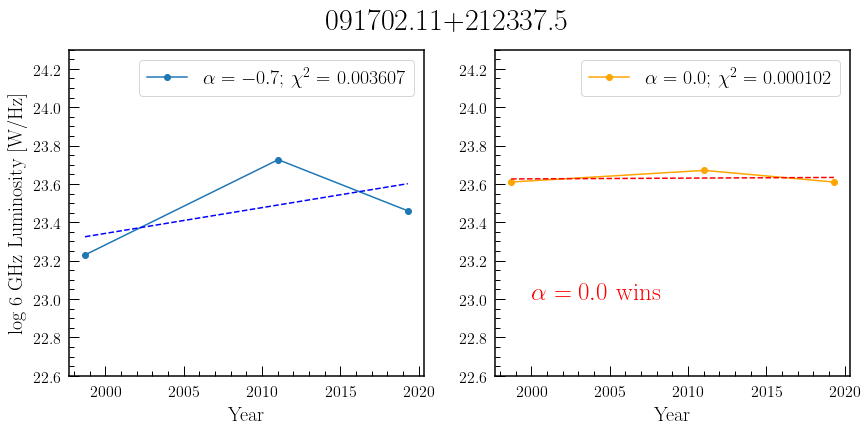

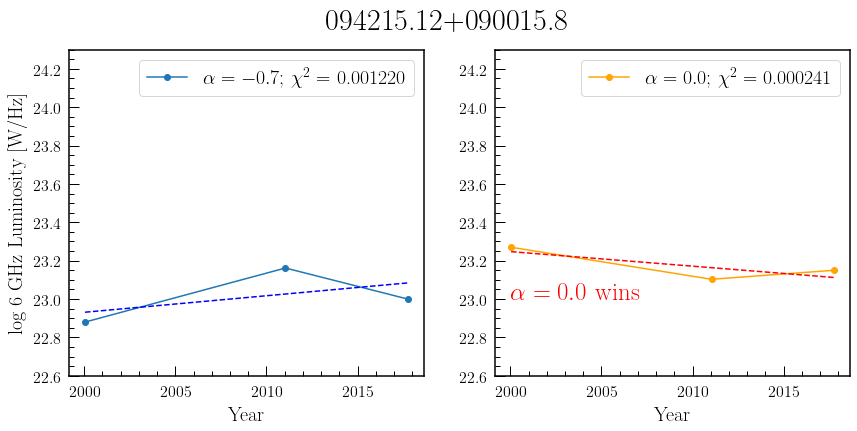

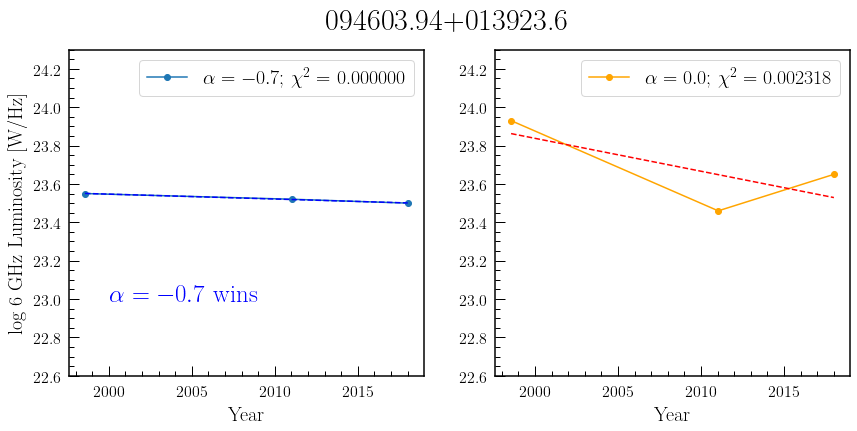

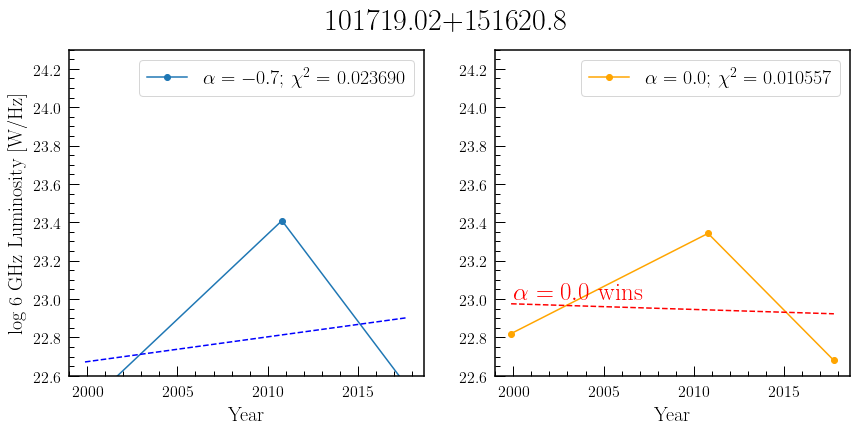

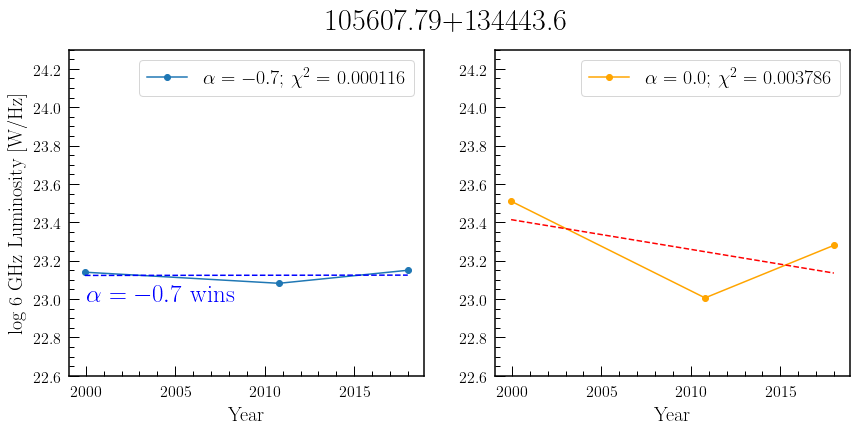

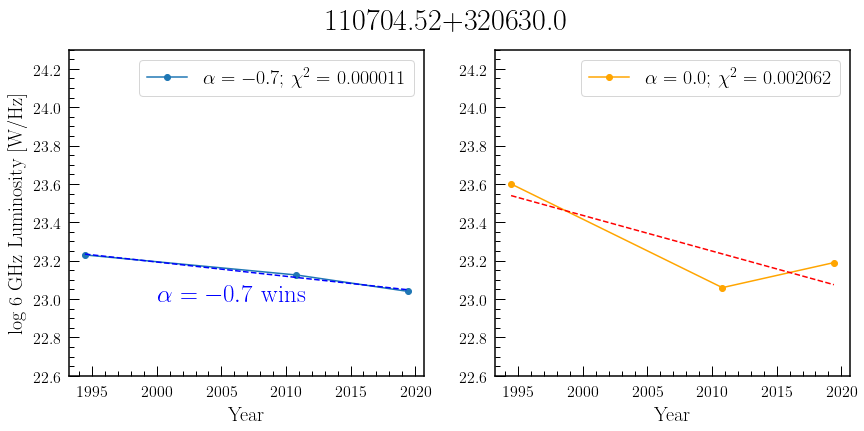

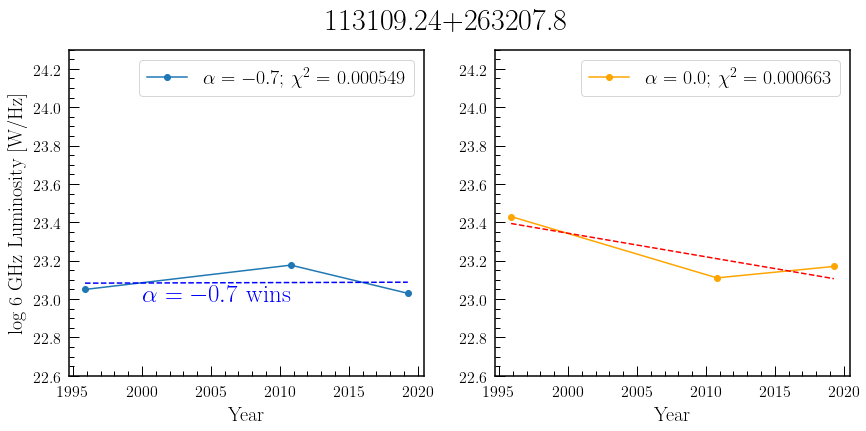

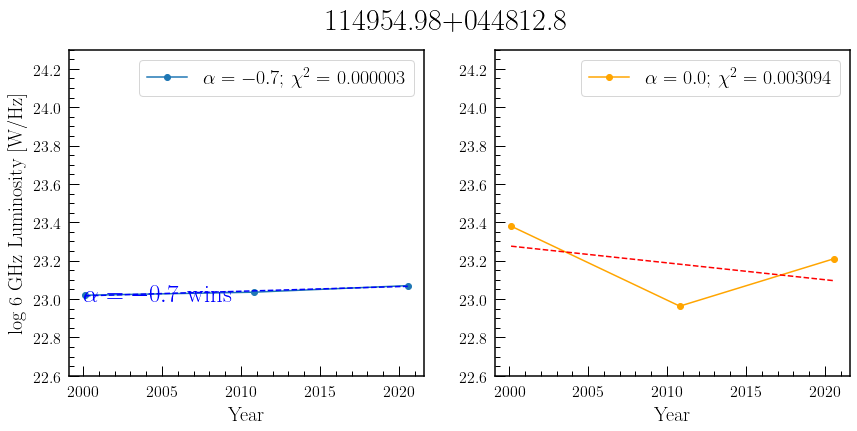

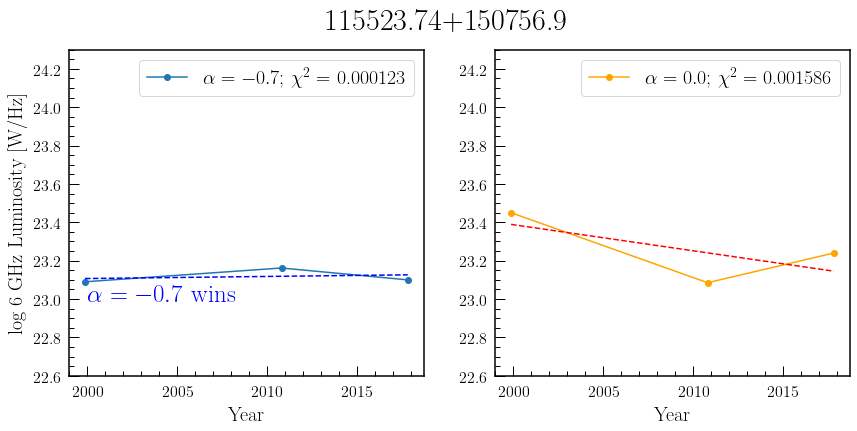

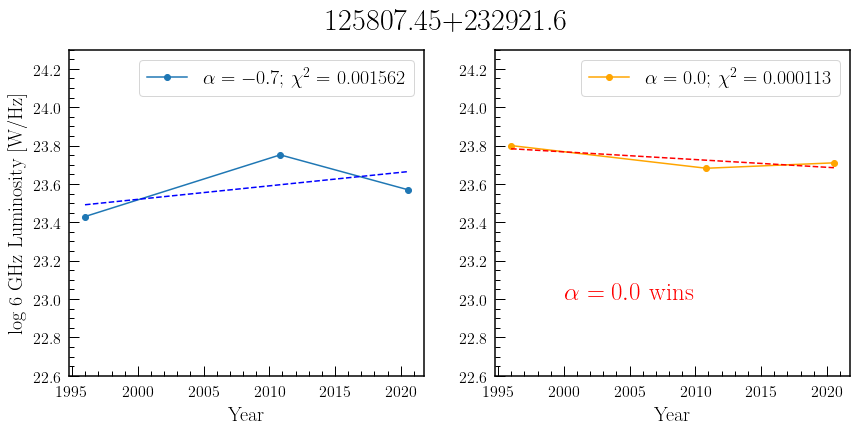

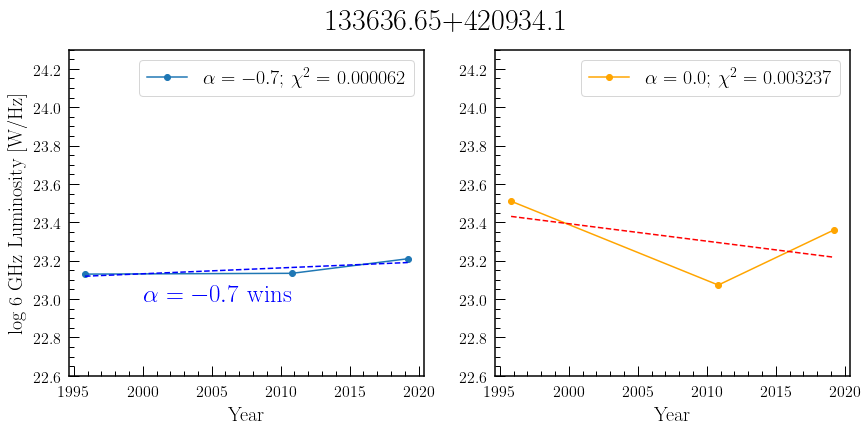

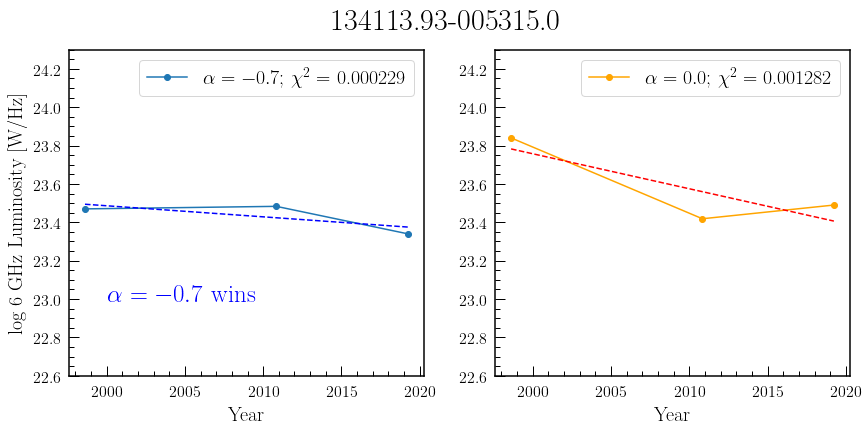

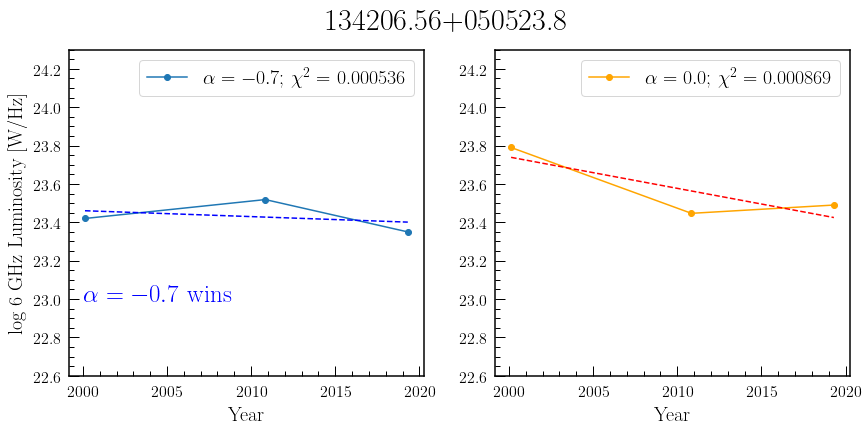

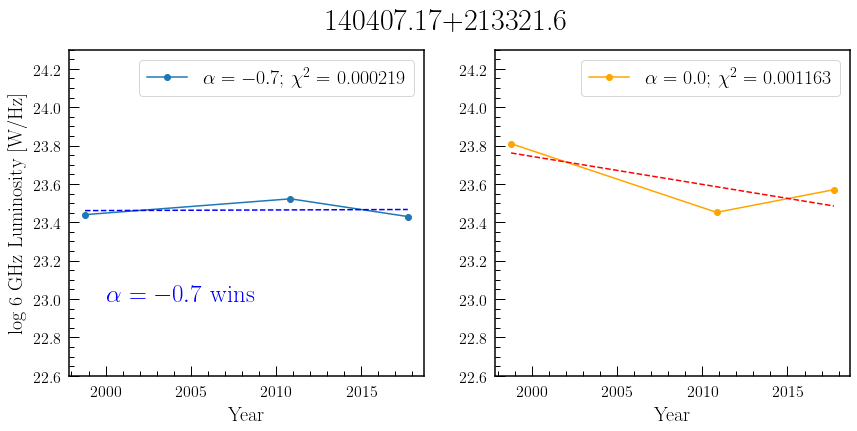

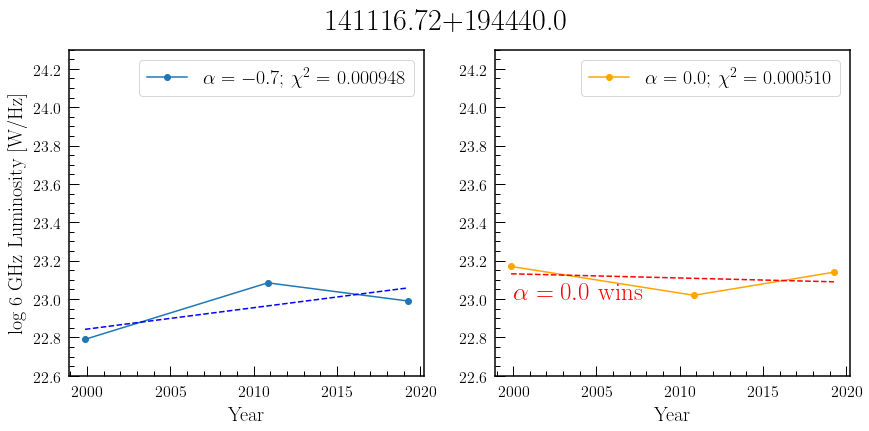

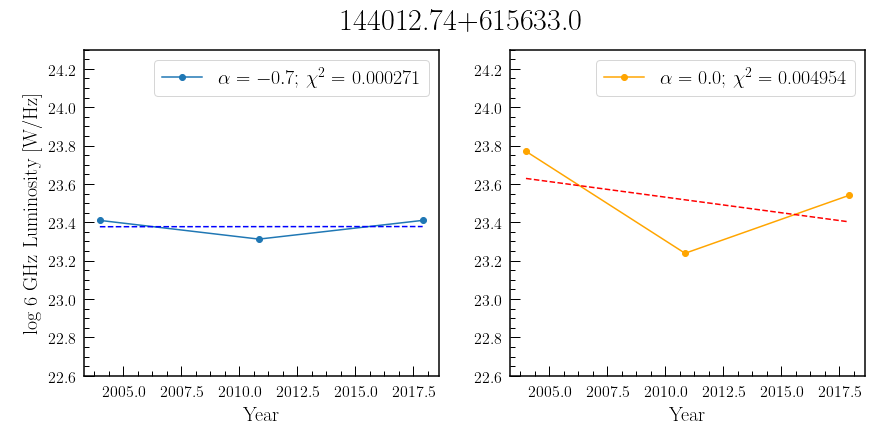

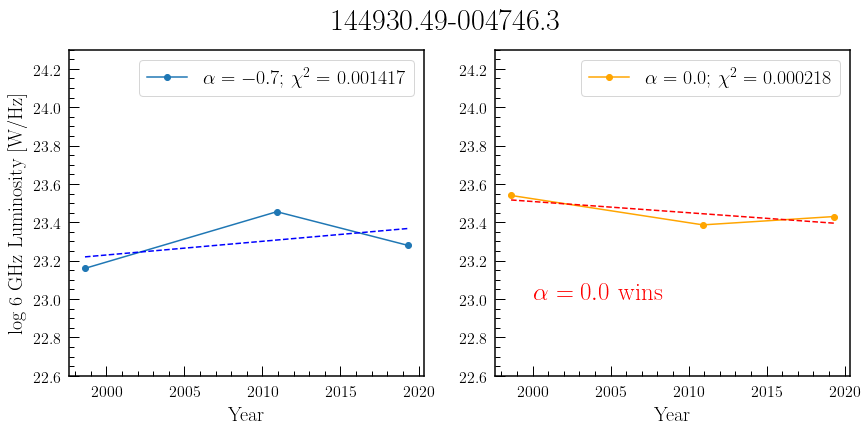

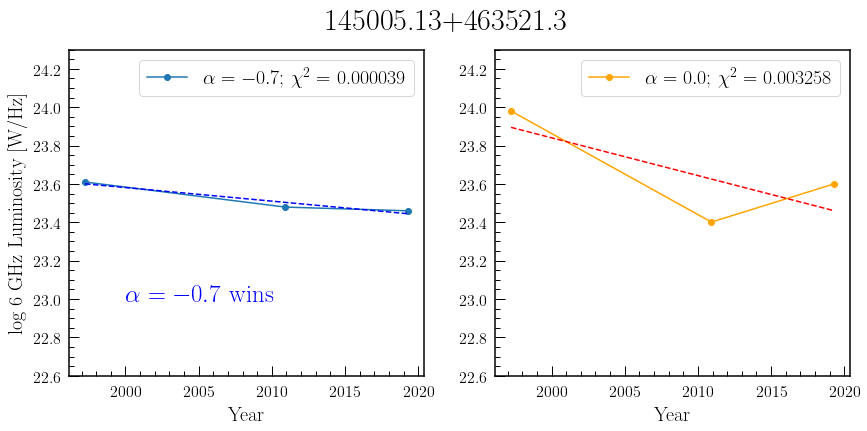

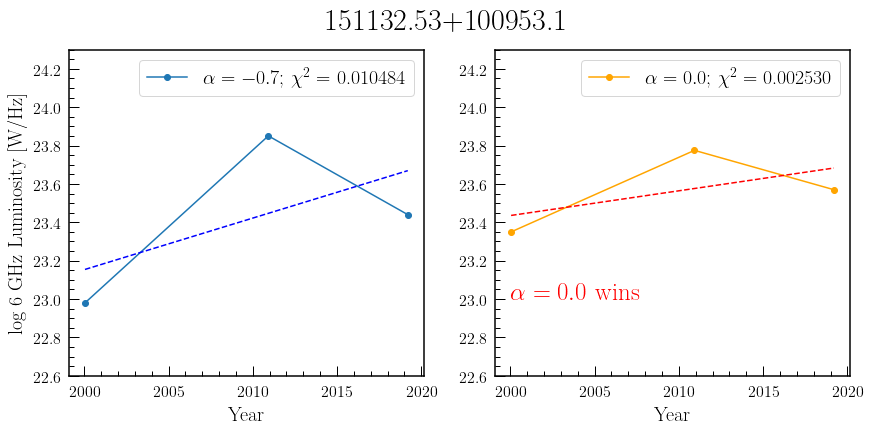

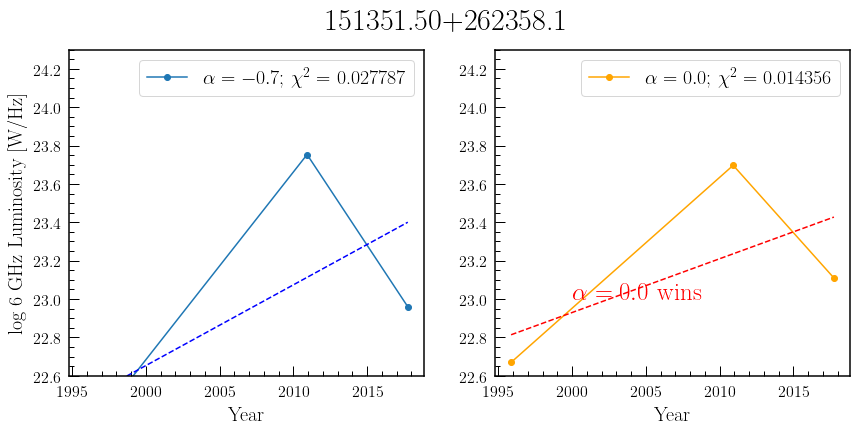

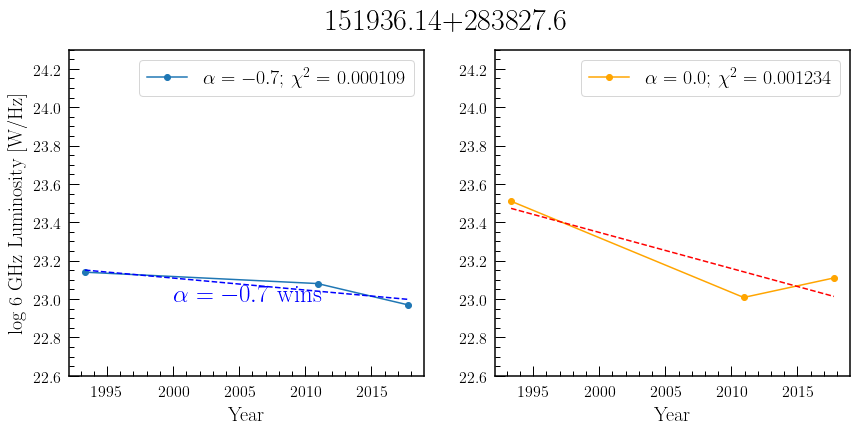

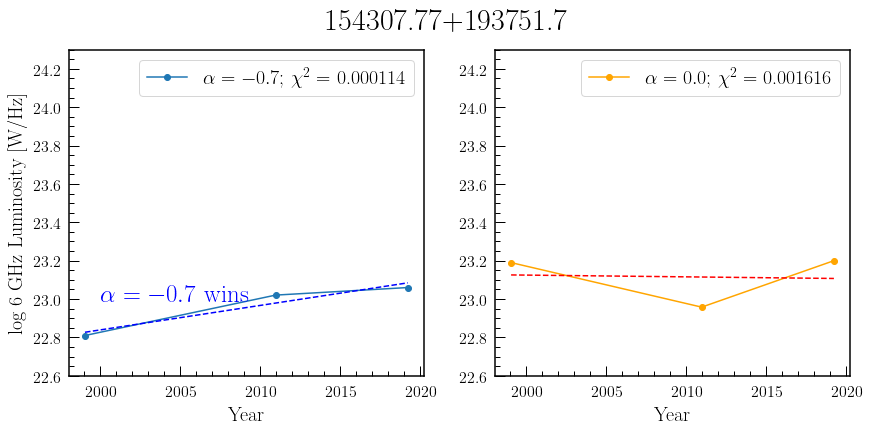

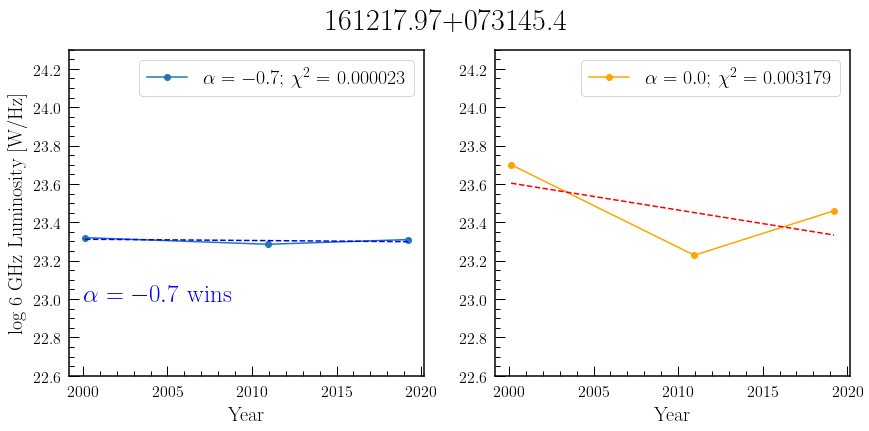

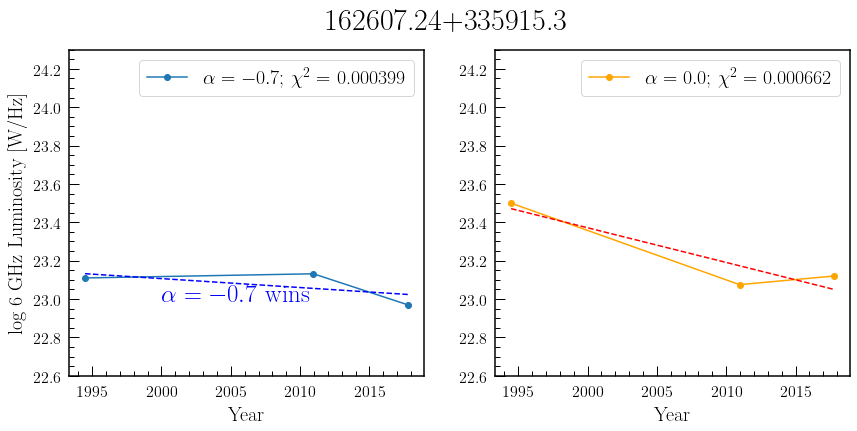

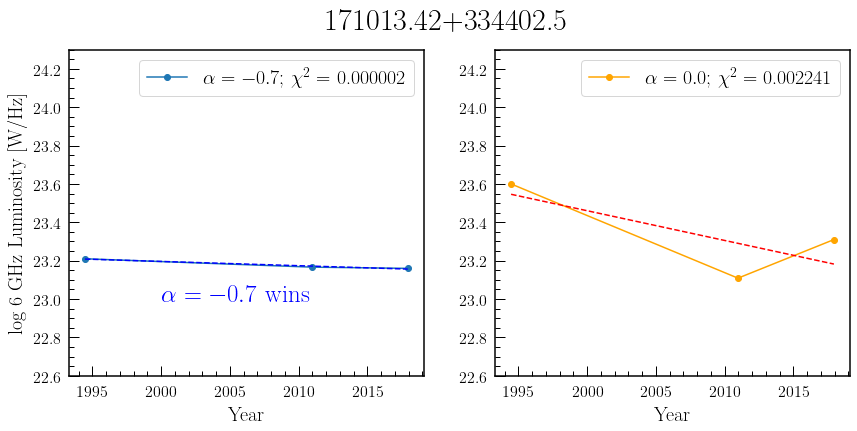

Radio-quiet spectral index counts:

alpha=0.0 : 8
alpha=-0.7: 19


In [50]:
num0 = 0
num7 = 0

#Store best spectral indices for each target based on chi squared
mid_indices = np.array([])
mid_alpha = np.ones(len(mids))
for i in range(len(mids)):
    if mids[["L6_FIRST"]].values.flatten()[i]>0:
        mid_indices = np.append(mid_indices, i)
        

for i in range(len(var_mid)):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_mid_fit[i,:], var_midup[i,:],1) 
    fit_alphaminp7 = np.polyfit(dates_mid_fit[i,:], var_mid[i,:],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_mid_fit[i,:] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_mid_fit[i,:] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(var_midup[i,:], y0)
    chisq_alphaminp7 = spstats.chisquare(var_mid[i,:], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23), color="blue", size=25)
        mid_alpha[int(mid_indices[int(i)])] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23), color="red", size=25)
        mid_alpha[int(mid_indices[int(i)])] = 0.0
    
    #plot true luminosities and their fits for each alpha side by side
    axs[0].plot(dates_mid_fit[i,:], var_mid[i,:], "-o", label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_mid_fit[i,:], y7, '--b')
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(22.6, 24.3)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].plot(dates_mid_fit[i,:], var_midup[i,:], "-o", color="orange", label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_mid_fit[i,:], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(22.6, 24.3)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(mid_names[i], fontsize=30)
    plt.show()
    
print("Radio-quiet spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)

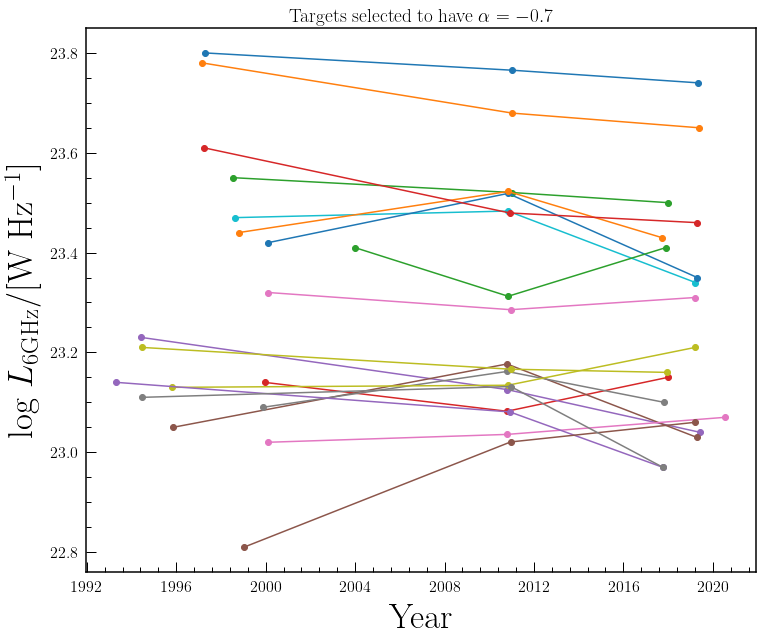

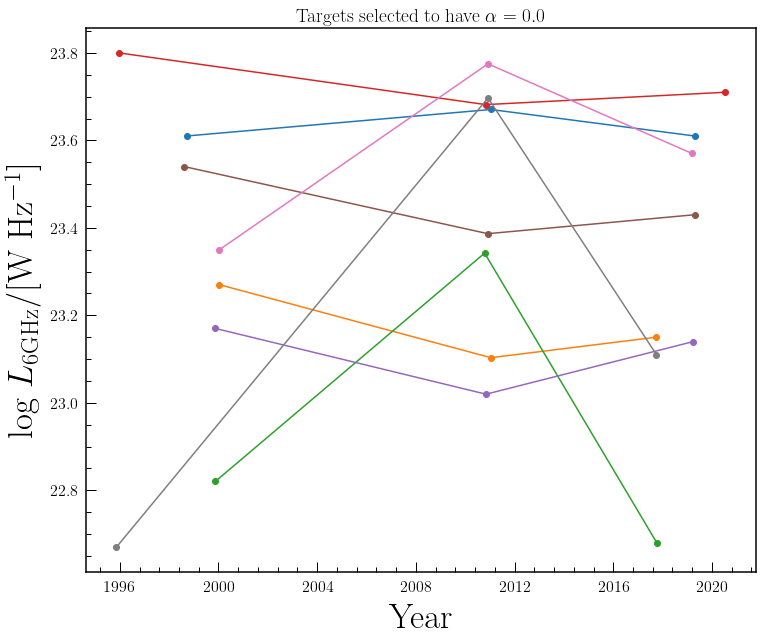

In [51]:
fig = plt.figure(figsize=(12,10))
for i in range((mid_alpha==-0.7).sum()):
    plt.plot(dates_mid[mid_alpha[mid_alpha!=1.]==-0.7][i,:], var_mid[mid_alpha[mid_alpha!=1.]==-0.7][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=-0.7$")    
plt.show()

fig = plt.figure(figsize=(12,10))
for i in range((mid_alpha==0.0).sum()):
    plt.plot(dates_mid[mid_alpha[mid_alpha!=1.]==0.0][i,:], var_midup[mid_alpha[mid_alpha!=1.]==0.0][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=0.0$")
plt.show()

Can easily omit the three sources that peak in 2011; there must be something else going on with them.  Interesting we only see that persistent shape in the intermediate sources

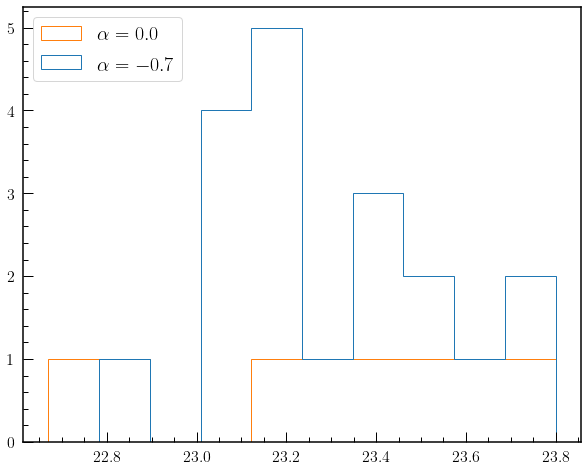

In [52]:
fig = plt.figure(figsize=(10,8))

plt.hist([mids[["L6_FIRST"]].values.flatten()[mid_alpha==-0.7], 
          mids[["L6_FIRST_alpha0"]].values.flatten()[mid_alpha==0.0]], histtype="step", 
         label=["$\\alpha=-0.7$", "$\\alpha=0.0$"])

plt.legend(loc="upper left", prop={"size": 20})

Luminosity doesn't appear to affect choice of spectral index, same as the RQ objects

In [53]:
#convert dates_loud to decimal yrs to pass to fit
dates_loud_fit = np.array([]).reshape(0,3)
for i in range(len(dates_loud)):
    dates_loud_fit_i = np.zeros(len(dates_loud[i]))
    for j in range(len(dates_loud[i])):
        dates_loud_fit_i[j] = dates_loud[i][j].year+(dates_loud[i][j].month-1)/12+dates_loud[i][j].day/365.25
    dates_loud_fit = np.vstack((dates_loud_fit, dates_loud_fit_i))

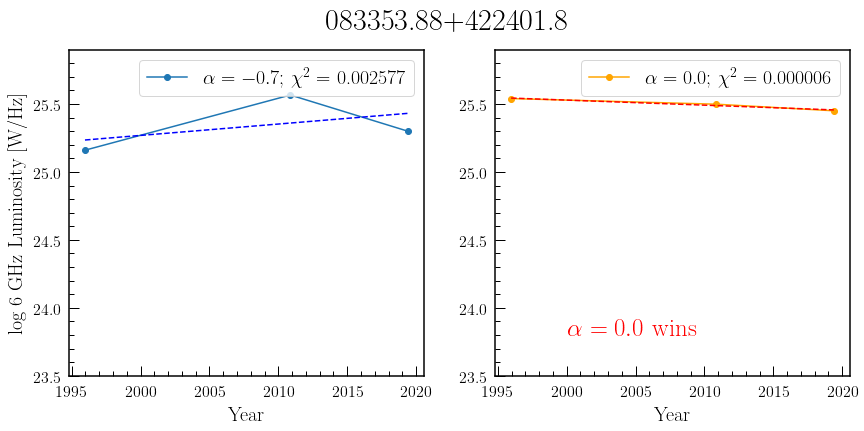

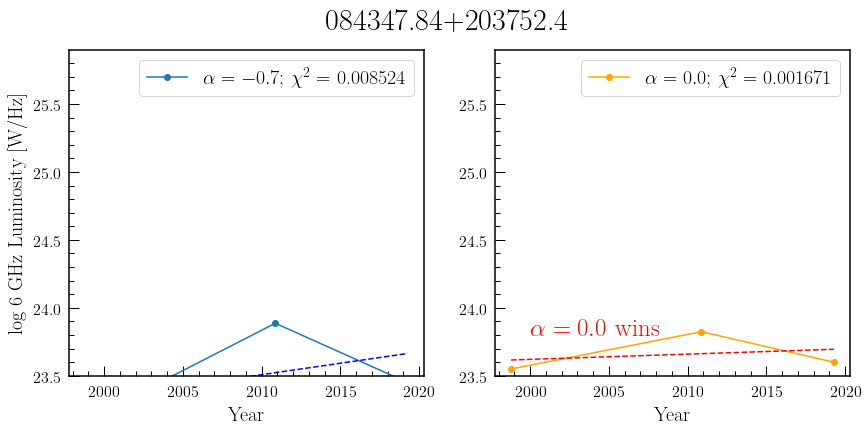

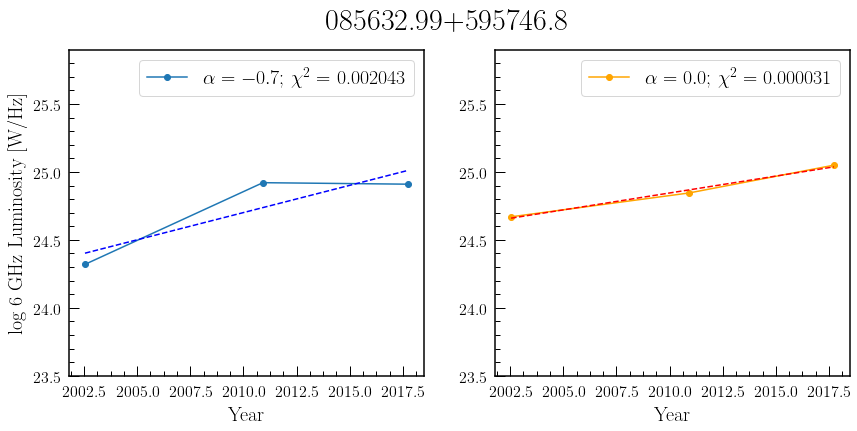

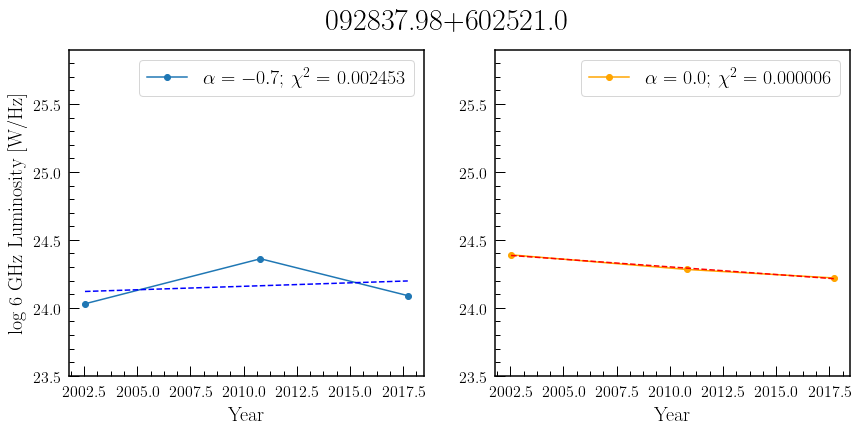

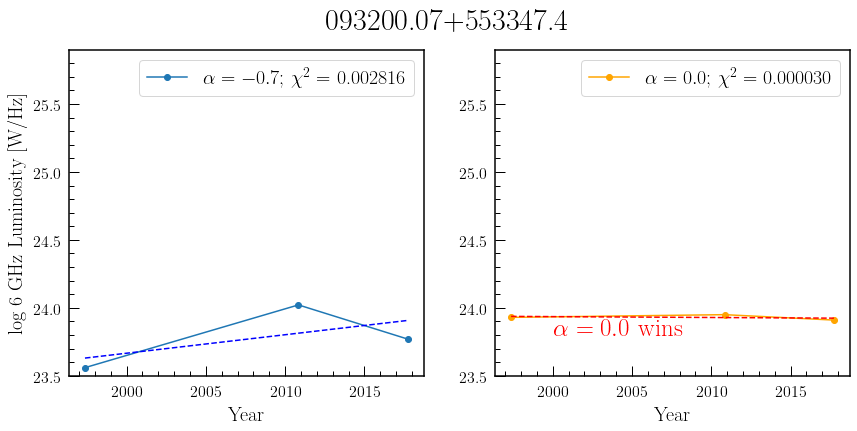

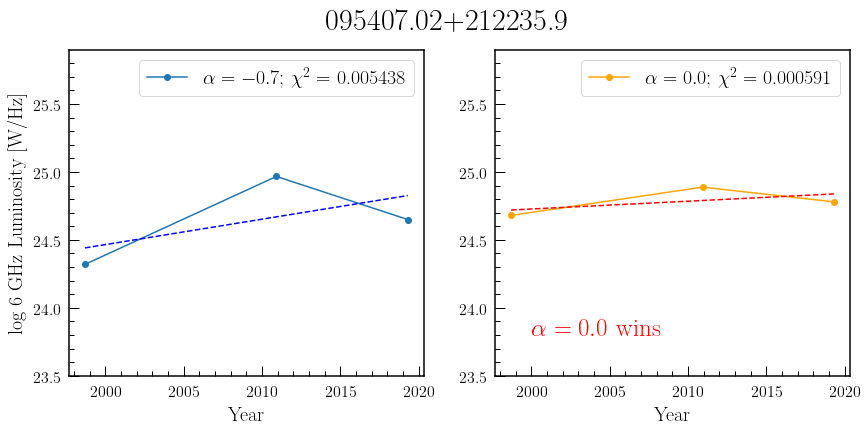

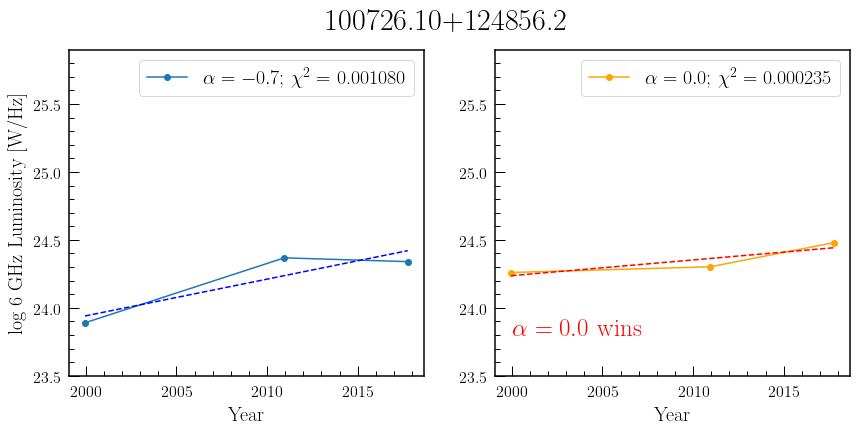

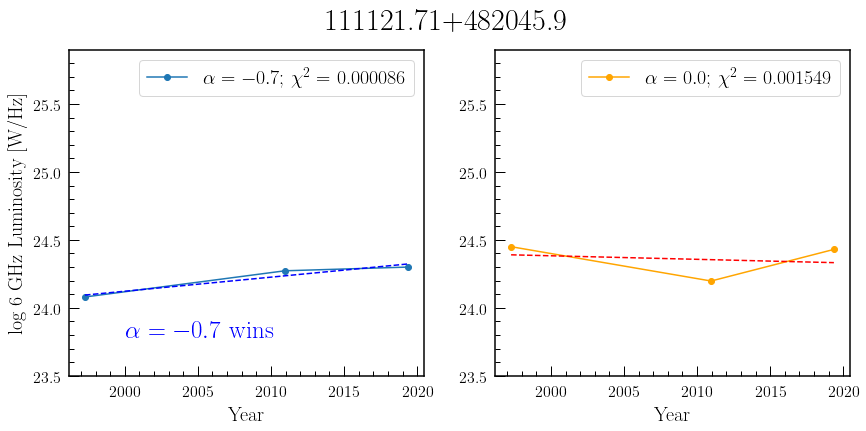

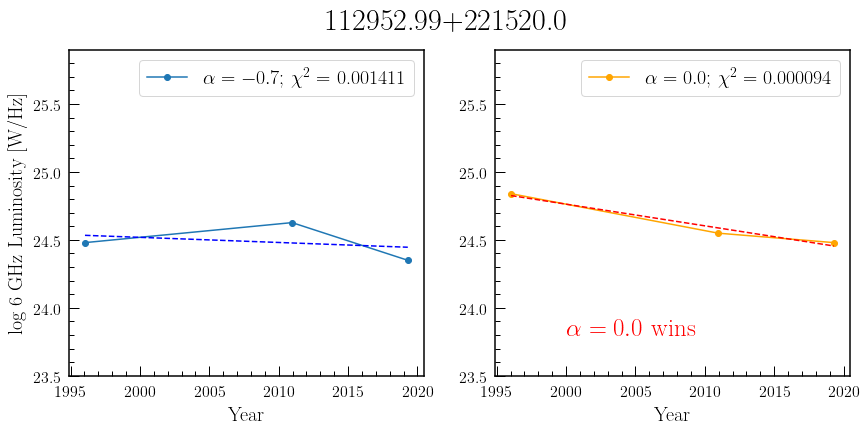

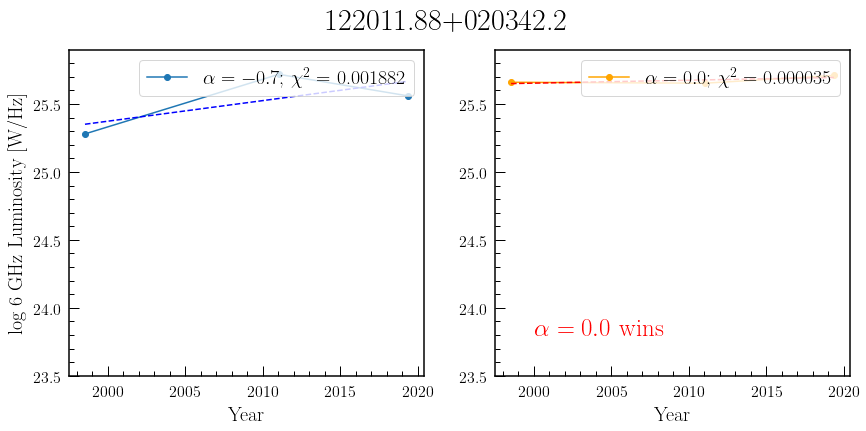

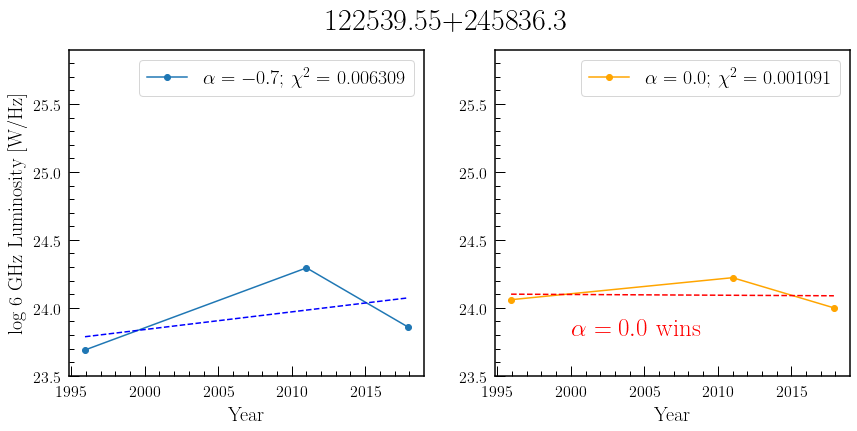

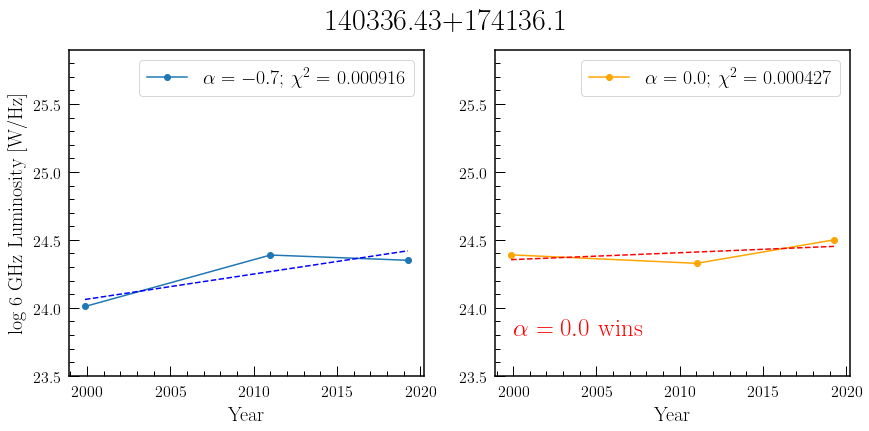

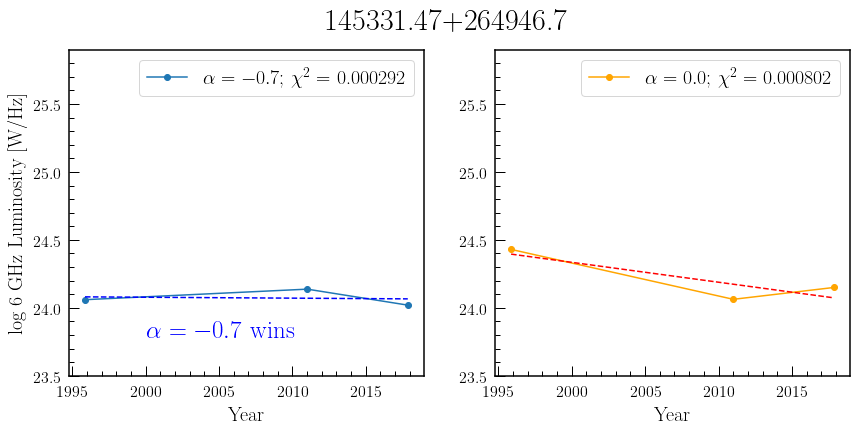

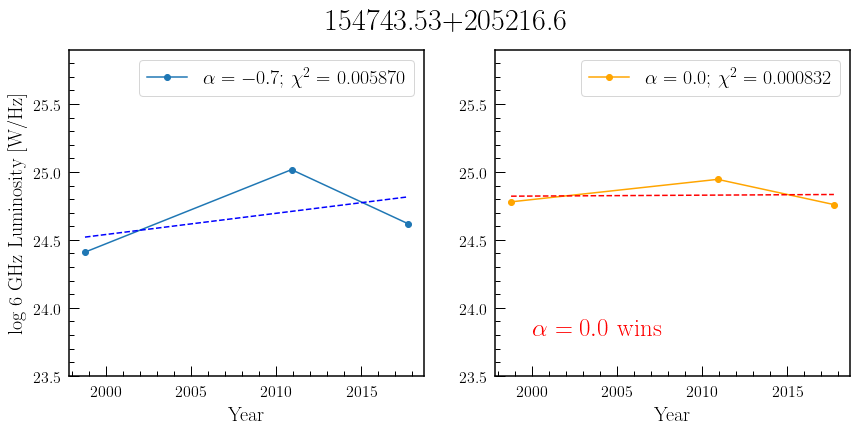

Radio-quiet spectral index counts:

alpha=0.0 : 12
alpha=-0.7: 2


In [54]:
num0 = 0
num7 = 0

#Store best spectral indices for each target based on chi squared
loud_indices = np.array([])
loud_alpha = np.ones(len(louds))
for i in range(len(louds)):
    if louds[["L6_FIRST"]].values.flatten()[i]>0:
        loud_indices = np.append(loud_indices, i)
        

for i in range(len(var_loud)):
    #do linear fit on both alpha=0.0 and -0.7 data
    fit_alpha0 = np.polyfit(dates_loud_fit[i,:], var_loudup[i,:],1) 
    fit_alphaminp7 = np.polyfit(dates_loud_fit[i,:], var_loud[i,:],1)
    
    #write out linear equations for those fits
    y0 = fit_alpha0[0]*dates_loud_fit[i,:] + fit_alpha0[1]
    y7 = fit_alphaminp7[0]*dates_loud_fit[i,:] + fit_alphaminp7[1]
    
    #do chi squared test to check which data follow the linear model better
    chisq_alpha0 = spstats.chisquare(var_loudup[i,:], y0)
    chisq_alphaminp7 = spstats.chisquare(var_loud[i,:], y7)
    
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    if chisq_alphaminp7 < chisq_alpha0:
        num7+=1
        axs[0].annotate(s="$\\alpha=-0.7$ wins", xy=(2000,23.8), color="blue", size=25)
        loud_alpha[int(loud_indices[int(i)])] = -0.7
    else:
        num0+=1
        axs[1].annotate(s="$\\alpha=0.0$ wins", xy=(2000,23.8), color="red", size=25)
        loud_alpha[int(loud_indices[int(i)])] = 0.0
    
    #plot true luminosities and their fits for each alpha side by side
    axs[0].plot(dates_loud_fit[i,:], var_loud[i,:], "-o", label="$\\alpha = -0.7$; $\chi^2 =$ {:4f}".format(chisq_alphaminp7[0]))
    axs[0].plot(dates_loud_fit[i,:], y7, '--b')
    axs[0].legend(loc="upper right", prop={"size":20})
    axs[0].set_ylim(23.5, 25.9)
    axs[0].set_xlabel("Year", fontsize=20)
    axs[0].set_ylabel("log 6 GHz Luminosity [W/Hz]", fontsize=20)
    axs[1].plot(dates_loud_fit[i,:], var_loudup[i,:], "-o", color="orange", label="$\\alpha = 0.0$; $\chi^2 =$ {:4f}".format(chisq_alpha0[0]))
    axs[1].plot(dates_loud_fit[i,:], y0, '--r')
    axs[1].legend(loc="upper right", prop={"size":20})
    axs[1].set_ylim(23.5, 25.9)
    axs[1].set_xlabel("Year", fontsize=20)
    
    plt.suptitle(loud_names[i], fontsize=30)
    plt.show()
    
print("Radio-quiet spectral index counts:\n")
print("alpha=0.0 : %d" % num0)
print("alpha=-0.7: %d" % num7)

This is perhaps the result that makes be truly believe in this analysis;  $\alpha=0.0$ is clearly the better choice for the radio-loud sources

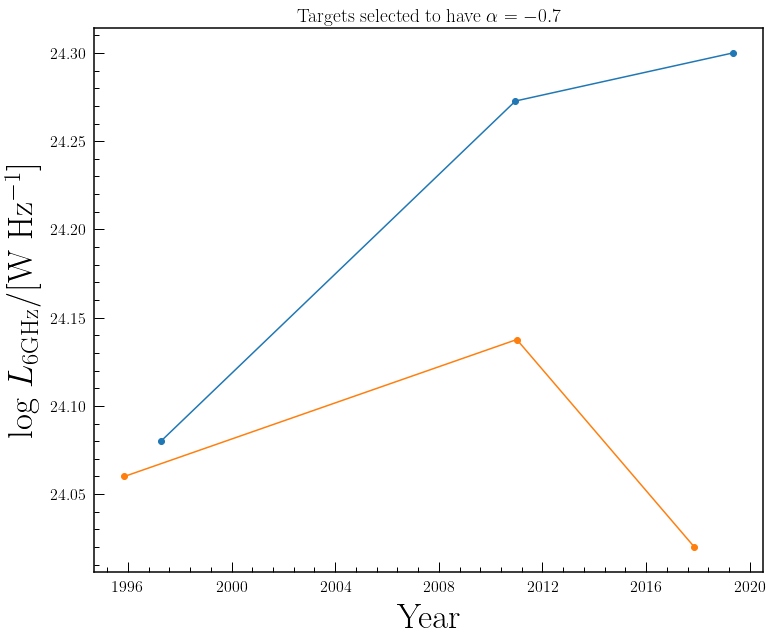

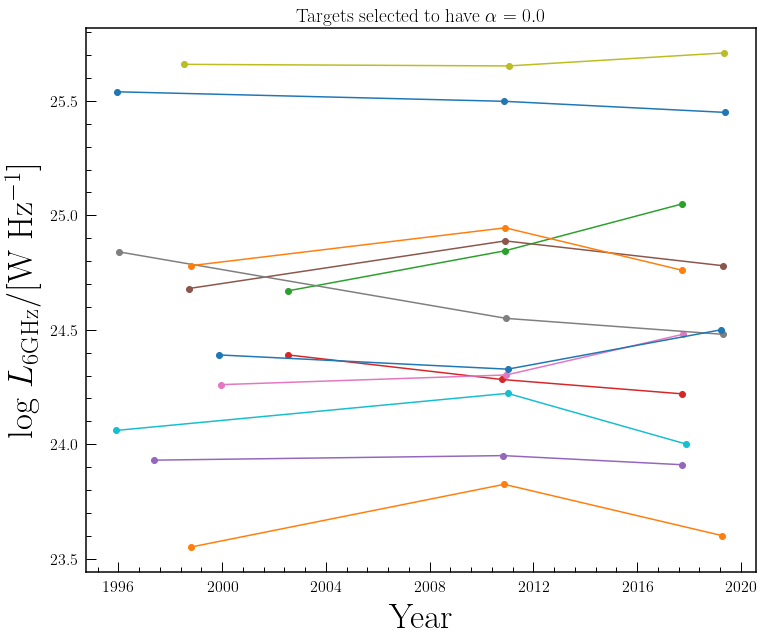

In [55]:
fig = plt.figure(figsize=(12,10))
for i in range((loud_alpha==-0.7).sum()):
    plt.plot(dates_loud[loud_alpha[loud_alpha!=1.]==-0.7][i,:], var_loud[loud_alpha[loud_alpha!=1.]==-0.7][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=-0.7$")    
plt.show()

fig = plt.figure(figsize=(12,10))
for i in range((loud_alpha==0.0).sum()):
    plt.plot(dates_loud[loud_alpha[loud_alpha!=1.]==0.0][i,:], var_loudup[loud_alpha[loud_alpha!=1.]==0.0][i,:], "-o")

plt.xlabel("Year", fontsize=35)
plt.ylabel("log $L_\mathrm{6GHz}$/[W Hz$^{-1}$]", fontsize=35)
plt.title("Targets selected to have $\\alpha=0.0$")
plt.show()

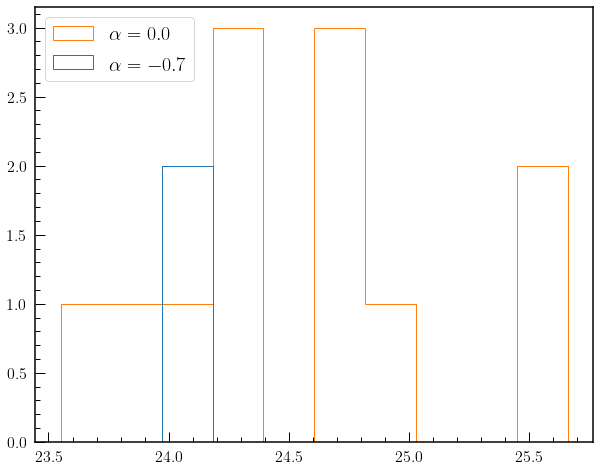

In [56]:
fig = plt.figure(figsize=(10,8))

plt.hist([louds[["L6_FIRST"]].values.flatten()[loud_alpha==-0.7], 
          louds[["L6_FIRST_alpha0"]].values.flatten()[loud_alpha==0.0]], histtype="step", 
         label=["$\\alpha=-0.7$", "$\\alpha=0.0$"])

plt.legend(loc="upper left", prop={"size": 20})

slightly different result for the loud sources - all those who predict $\alpha=-0.7$ are in the lower-luminosity regime of the louds

-----

Make some plots for the paper:


All light curves

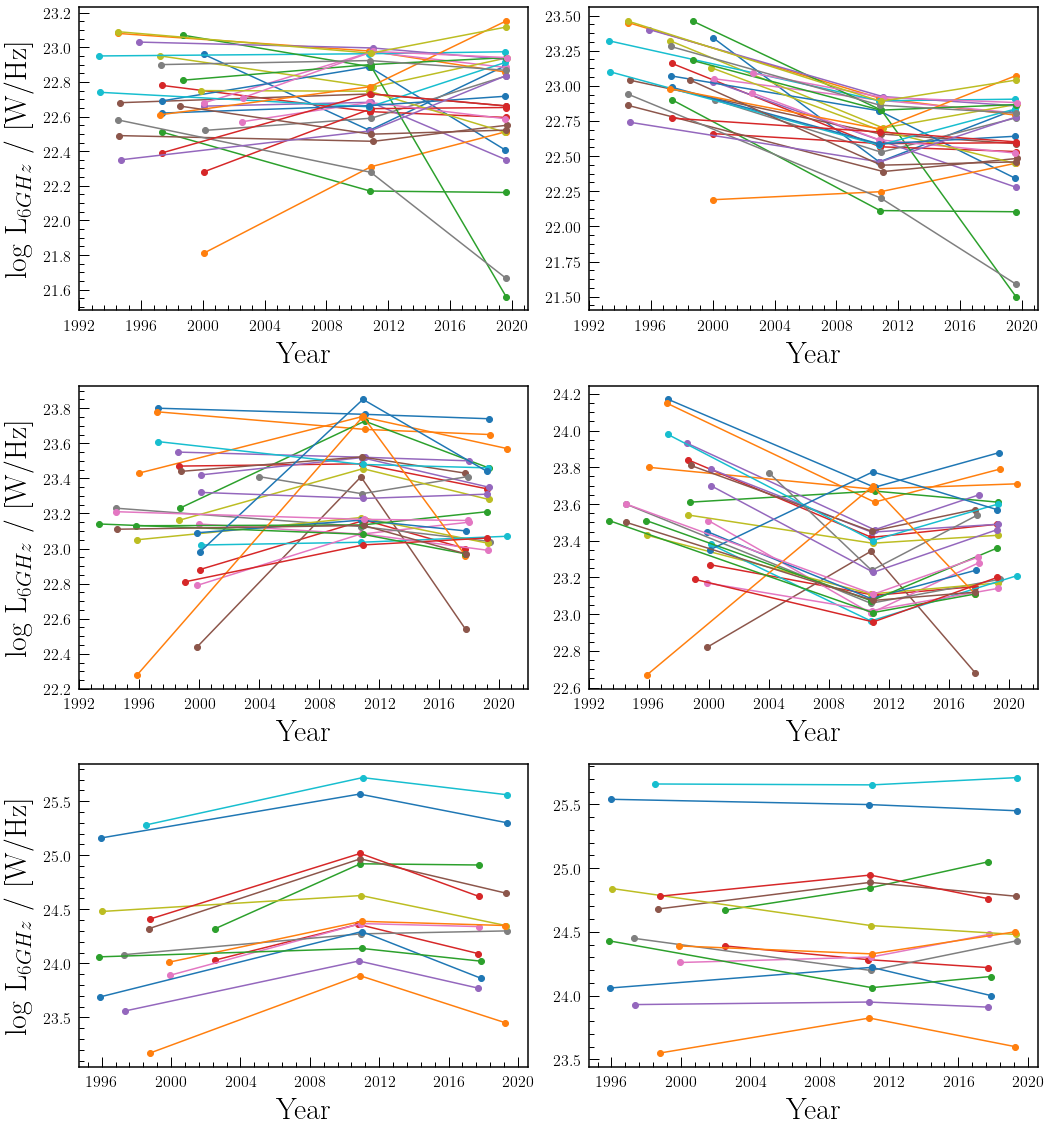

In [61]:
fig, axs = plt.subplots(3, 2, figsize=(15, 16))

for i in range(len(var_data)):
    axs[0,0].plot(dates[i,:], var_data[i,:], "-o")

axs[0,0].set_xlabel("Year", fontsize=30)
axs[0,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,0].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=-0.7$")
#plt.ylim(21.6,23.25)


for i in range(len(var_data)):
    axs[0,1].plot(dates[i,:], var_dataup[i,:], "-o")

axs[0,1].set_xlabel("Year", fontsize=30)
#axs[0,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,1].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)


for i in range(len(var_mid)):
    axs[1,0].plot(dates_mid[i,:], var_mid[i,:], "-o")

axs[1,0].set_xlabel("Year", fontsize=30)
axs[1,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,1].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)


for i in range(len(var_mid)):
    axs[1,1].plot(dates_mid[i,:], var_midup[i,:], "-o")

axs[1,1].set_xlabel("Year", fontsize=30)
#axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,1].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)


for i in range(len(var_loud)):
    axs[2,0].plot(dates_loud[i,:], var_loud[i,:], "-o")

axs[2,0].set_xlabel("Year", fontsize=30)
axs[2,0].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,1].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)


for i in range(len(var_loud)):
    axs[2,1].plot(dates_loud[i,:], var_loudup[i,:], "-o")

axs[2,1].set_xlabel("Year", fontsize=30)
#axs[1,1].set_ylabel("log L$_{6GHz}$ / [W/Hz]", fontsize=30)
#axs[0,1].set_title("FIRST/VLASS shifted to C-band assuming $\\alpha=0.0$")
#plt.ylim(21.6,23.25)


plt.tight_layout()
plt.savefig("PaperPlots/all_light_curves.pdf")
plt.show()